# Player data match season 2024/2025 English Premier League Data Preprocessing

## Helper functions

In [2]:
def CatDataQualityReport(data):
    variable_names = []
    total_values = []
    perc_missing_values = []
    unique_value_list = []
    mode = []
    mode_freq = []
    mode_percentage = []
    second_mode = []
    second_mode_freq = []
    second_mode_percentage = []

    for name in data.columns:
        mode_series = data[name].mode()
        dic_value_counts = data[name].value_counts()
        ordered_keys = dic_value_counts.keys()

        variable_names.append(name)
        total_values.append(data[name].size)
        perc_missing_values.append(((data[name].isnull().sum()/data[name].size)*100))
        unique_value_list.append(data[name].unique().size)
        mode.append(mode_series[0])
        mode_freq.append(dic_value_counts[ordered_keys[0]])
        mode_percentage.append(((dic_value_counts[mode_series[0]]/data[name].size)*100))

        if len(ordered_keys) > 1:
            second_mode.append(ordered_keys[1])
            second_mode_freq.append(dic_value_counts[ordered_keys[1]])
            second_mode_percentage.append(f"{((dic_value_counts[ordered_keys[1]]/data[name].size)*100):.2f}")

        else:
            second_mode.append('na')
            second_mode_freq.append('na')
            second_mode_percentage.append('na')

    missing_data=pd.DataFrame({"Feature":variable_names,\
                            "Count":total_values,\
                                "% Miss":perc_missing_values,\
                                "Card.":unique_value_list,\
                                "Mode":mode,\
                                "Mode Freq.":mode_freq,
                                "Mode %":mode_percentage,\
                                "2nd Mode":second_mode ,\
                                "2nd Mode Freq": second_mode_freq,\
                                '2nd Mode %':second_mode_percentage
                                })

    report = missing_data.set_index("Feature")
    report = report.sort_values("% Miss",ascending=False)
    #report = report.sort_values("Card.")

    return report

## Load Data

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
df  = pd.read_csv("English_Premier_League_Players_Statistics2020-09-24.csv")

print('Shape of the dataset is {}'.format(df .shape))

df .head(1)

Shape of the dataset is (571, 59)


Name  Jersey Number     Club    Position Nationality   Age  \
0  Bernd Leno            1.0  Arsenal  Goalkeeper     Germany  28.0   

   Appearances  Wins  Losses  Goals  ...  Punches  High Claims  Catches  \
0           64    28      16      0  ...     34.0         26.0     17.0   

   Sweeper clearances  Throw outs  Goal Kicks  Yellow cards  Red cards Fouls  \
0                28.0       375.0       489.0             2          0     0   

   Offsides  
0       NaN  

[1 rows x 59 columns]

## Data Exploration

In [5]:
data_info = CatDataQualityReport(df.select_dtypes(include='object'))
data_info

Count     % Miss  Card.            Mode  Mode Freq.  \
Feature                                                                    
Shooting accuracy %    571  45.884413     51              0%          44   
Tackle success %       571  31.698774     55              0%          67   
Cross accuracy %       571  31.698774     45              0%          87   
Nationality            571   0.175131     58         England         221   
Position               571   0.000000      4      Midfielder         198   
Name                   571   0.000000    571  Aaron Connolly           1   
Club                   571   0.000000     20       Liverpool          34   

                        Mode %                  2nd Mode  2nd Mode Freq  \
Feature                                                                   
Shooting accuracy %   7.705779                       41%             12   
Tackle success %     11.733800                       67%             20   
Cross accuracy %     15.236427                       20%             24   
Nationality          38.704028                    France             30   
Position             34.676007                  Defender            194   
Name                  0.175131                Bernd Leno              1   
Club                  5.954466  Brighton-and-Hove-Albion             33   

                    2nd Mode %  
Feature                         
Shooting accuracy %       2.10  
Tackle success %          3.50  
Cross accuracy %          4.20  
Nationality               5.25  
Position                 33.98  
Name                      0.18  
Club                      5.78

Need to change % to floats

In [6]:
df.describe().T

count         mean          std   min     25%  \
Jersey Number           563.0    19.534636    14.273515   1.0   8.000   
Age                     570.0    25.789474     4.377354  17.0  22.000   
Appearances             571.0    68.823117    81.797516   0.0   3.000   
Wins                    571.0    28.957968    38.969376   0.0   1.000   
Losses                  571.0    23.896673    28.488376   0.0   1.000   
Goals                   571.0     7.327496    16.810490   0.0   0.000   
Goals per match         309.0     2.648414     8.002117   0.0   0.050   
Headed goals            502.0     1.414343     3.433374   0.0   0.000   
Goals with right foot   502.0     4.468127    11.048341   0.0   0.000   
Goals with left foot    502.0     2.388446     6.295652   0.0   0.000   
Penalties scored        309.0     0.974110     3.355453   0.0   0.000   
Freekicks scored        309.0     0.291262     0.989862   0.0   0.000   
Shots                   309.0   102.504854   144.955336   0.0   6.000   
Shots on target         309.0    36.915858    57.506911   0.0   1.000   
Hit woodwork            502.0     2.061753     3.881757   0.0   0.000   
Big chances missed      309.0     9.029126    16.614297   0.0   0.000   
Clean sheets            262.0    16.687023    23.602904   0.0   0.000   
Goals conceded          262.0    75.694656    95.489454   0.0   0.250   
Tackles                 502.0   101.077689   141.646209   0.0   5.000   
Last man tackles        193.0     1.259067     2.937763   0.0   0.000   
Blocked shots           502.0    20.551793    32.334213   0.0   0.000   
Interceptions           502.0    72.760956   109.166771   0.0   2.000   
Clearances              502.0   141.627490   306.460338   0.0   3.000   
Headed Clearance        502.0    69.912351   143.715038   0.0   1.000   
Clearances off line     193.0     1.036269     1.940181   0.0   0.000   
Recoveries              390.0   326.905128   404.247950   0.0  10.250   
Duels won               390.0   313.815385   388.337412   0.0  12.000   
Duels lost              390.0   275.864103   341.458793   0.0  12.000   
Successful 50/50s       390.0    49.253846    74.374891   0.0   2.000   
Aerial battles won      390.0    99.758974   157.917760   0.0   3.000   
Aerial battles lost     390.0    84.848718   109.751742   0.0   3.000   
Own goals               262.0     0.408397     0.965500   0.0   0.000   
Errors leading to goal  459.0     1.100218     2.423227   0.0   0.000   
Assists                 571.0     5.285464     9.761765   0.0   0.000   
Passes                  571.0  2309.704028  3127.226566   0.0  92.000   
Passes per match        571.0    25.895989    18.566906   0.0  11.255   
Big chances created     502.0     8.171315    13.386715   0.0   0.000   
Crosses                 502.0   121.920319   244.916813   0.0   2.000   
Through balls           390.0     8.576923    20.113636   0.0   0.000   
Accurate long balls     459.0   184.856209   312.702345   0.0   3.000   
Saves                    69.0   150.478261   230.511491   0.0   0.000   
Penalties saved          69.0     1.086957     1.615542   0.0   0.000   
Punches                  69.0    24.652174    46.282644   0.0   0.000   
High Claims              69.0    45.869565    82.332167   0.0   0.000   
Catches                  69.0    20.782609    43.058397   0.0   0.000   
Sweeper clearances       69.0    25.565217    47.333758   0.0   0.000   
Throw outs               69.0   210.000000   334.822473   0.0   0.000   
Goal Kicks               69.0   414.144928   641.246265   0.0   0.000   
Yellow cards            571.0     7.917688    11.556811   0.0   0.000   
Red cards               571.0     0.301226     0.698607   0.0   0.000   
Fouls                   571.0    53.033275    75.605560   0.0   1.000   
Offsides                502.0    11.063745    26.570058   0.0   0.000   

                            50%      75%      max  
Jersey Number             18.00    27.00     82.0  
Age                       26.00    29.00     38.0 

In [7]:
df.shape

(571, 59)

In [8]:
print(df.duplicated().sum())

0


In [9]:
df['Club'].nunique()

20

In [10]:
df['Position'].unique()

array(['Goalkeeper', 'Defender', 'Midfielder', 'Forward'], dtype=object)

In [11]:
df.isnull().sum().sort_values(ascending=True)

Name                        0
Club                        0
Position                    0
Wins                        0
Appearances                 0
Losses                      0
Goals                       0
Assists                     0
Yellow cards                0
Passes per match            0
Fouls                       0
Red cards                   0
Passes                      0
Age                         1
Nationality                 1
Jersey Number               8
Clearances                 69
Headed Clearance           69
Interceptions              69
Goals with right foot      69
Goals with left foot       69
Blocked shots              69
Tackles                    69
Offsides                   69
Big chances created        69
Crosses                    69
Headed goals               69
Hit woodwork               69
Errors leading to goal    112
Accurate long balls       112
Recoveries                181
Tackle success %          181
Cross accuracy %          181
Through balls             181
Successful 50/50s         181
Aerial battles won        181
Duels lost                181
Aerial battles lost       181
Duels won                 181
Freekicks scored          262
Penalties scored          262
Goals per match           262
Shots on target           262
Shots                     262
Shooting accuracy %       262
Big chances missed        262
Clean sheets              309
Goals conceded            309
Own goals                 309
Last man tackles          378
Clearances off line       378
Saves                     502
Catches                   502
Penalties saved           502
High Claims               502
Punches                   502
Goal Kicks                502
Throw outs                502
Sweeper clearances        502
dtype: int64

## Data Cleaning

In [12]:
# Rows missing Age
missing_age = df[df['Age'].isnull()]

# Rows missing Nationality
missing_nationality = df[df['Nationality'].isnull()]

print("Missing Age entry:")
print(missing_age[['Name','Club','Position','Age','Nationality']])

print("\nMissing Nationality entry:")
print(missing_nationality[['Name','Club','Position','Age','Nationality']])

Missing Age entry:
               Name          Club    Position  Age Nationality
241  Ezgjan Alioski  Leeds-United  Midfielder  NaN         NaN

Missing Nationality entry:
               Name          Club    Position  Age Nationality
241  Ezgjan Alioski  Leeds-United  Midfielder  NaN         NaN


In [13]:
# Remove entries which do not have nationality
df = df[df['Age'].notna()]

In [14]:
# Cleaning the percentage sign, turning into float, and converting to decimal
df['Cross accuracy %']   = df['Cross accuracy %'].str.replace(r'%', '').astype(float) / 100.0
df['Shooting accuracy %'] = df['Shooting accuracy %'].str.replace(r'%', '').astype(float) / 100.0
df['Tackle success %']   = df['Tackle success %'].str.replace(r'%', '').astype(float) / 100.0

In [15]:
# Fill event counts with 0
event_cols = ['Goals per match','Penalties scored','Freekicks scored','Shots','Shots on target',
              'Hit woodwork','Big chances missed','Clean sheets','Goals conceded','Tackles',
              'Last man tackles','Blocked shots','Interceptions','Clearances','Headed Clearance',
              'Clearances off line','Recoveries','Duels won','Duels lost','Successful 50/50s',
              'Aerial battles won','Aerial battles lost','Own goals','Errors leading to goal',
              'Big chances created','Crosses','Through balls','Accurate long balls','Saves',
              'Penalties saved','Punches','High Claims','Catches','Sweeper clearances',
              'Throw outs','Goal Kicks','Offsides','Headed goals','Goals with right foot','Goals with left foot','Shooting accuracy %',
              'Tackle success %','Cross accuracy %','Jersey Number']
df[event_cols] = df[event_cols].fillna(0)


In [16]:
df.isnull().sum().sort_values(ascending=False)

Name                      0
Jersey Number             0
Club                      0
Position                  0
Nationality               0
Age                       0
Appearances               0
Wins                      0
Losses                    0
Goals                     0
Goals per match           0
Headed goals              0
Goals with right foot     0
Goals with left foot      0
Penalties scored          0
Freekicks scored          0
Shots                     0
Shots on target           0
Shooting accuracy %       0
Hit woodwork              0
Big chances missed        0
Clean sheets              0
Goals conceded            0
Tackles                   0
Tackle success %          0
Last man tackles          0
Blocked shots             0
Interceptions             0
Clearances                0
Headed Clearance          0
Clearances off line       0
Recoveries                0
Duels won                 0
Duels lost                0
Successful 50/50s         0
Aerial battles won        0
Aerial battles lost       0
Own goals                 0
Errors leading to goal    0
Assists                   0
Passes                    0
Passes per match          0
Big chances created       0
Crosses                   0
Cross accuracy %          0
Through balls             0
Accurate long balls       0
Saves                     0
Penalties saved           0
Punches                   0
High Claims               0
Catches                   0
Sweeper clearances        0
Throw outs                0
Goal Kicks                0
Yellow cards              0
Red cards                 0
Fouls                     0
Offsides                  0
dtype: int64

In [17]:
data_info = CatDataQualityReport(df.select_dtypes(include='object'))
data_info

Count  % Miss  Card.            Mode  Mode Freq.     Mode %  \
Feature                                                                    
Name           570     0.0    570  Aaron Connolly           1   0.175439   
Club           570     0.0     20       Liverpool          34   5.964912   
Position       570     0.0      4      Midfielder         197  34.561404   
Nationality    570     0.0     57         England         221  38.771930   

                             2nd Mode  2nd Mode Freq 2nd Mode %  
Feature                                                          
Name                       Bernd Leno              1       0.18  
Club         Brighton-and-Hove-Albion             33       5.79  
Position                     Defender            194      34.04  
Nationality                    France             30       5.26

In [18]:
df.describe().T

count         mean          std   min    25%  \
Jersey Number           570.0    19.277193    14.365442   0.0   8.00   
Age                     570.0    25.789474     4.377354  17.0  22.00   
Appearances             570.0    68.942105    81.819888   0.0   3.00   
Wins                    570.0    29.007018    38.985960   0.0   1.00   
Losses                  570.0    23.938596    28.495763   0.0   1.25   
Goals                   570.0     7.340351    16.822446   0.0   0.00   
Goals per match         570.0     1.433965     6.033988   0.0   0.00   
Headed goals            570.0     1.245614     3.254202   0.0   0.00   
Goals with right foot   570.0     3.935088    10.468011   0.0   0.00   
Goals with left foot    570.0     2.103509     5.958098   0.0   0.00   
Penalties scored        570.0     0.528070     2.516047   0.0   0.00   
Freekicks scored        570.0     0.157895     0.742614   0.0   0.00   
Shots                   570.0    55.566667   118.265778   0.0   0.00   
Shots on target         570.0    20.010526    46.141601   0.0   0.00   
Shooting accuracy %     570.0     0.153719     0.195418   0.0   0.00   
Hit woodwork            570.0     1.815789     3.703335   0.0   0.00   
Big chances missed      570.0     4.894737    13.026516   0.0   0.00   
Clean sheets            570.0     7.670175    18.022832   0.0   0.00   
Goals conceded          570.0    34.792982    74.887397   0.0   0.00   
Tackles                 570.0    89.017544   136.899639   0.0   0.00   
Tackle success %        570.0     0.358632     0.336102   0.0   0.00   
Last man tackles        570.0     0.426316     1.807719   0.0   0.00   
Blocked shots           570.0    18.100000    31.064627   0.0   0.00   
Interceptions           570.0    64.078947   105.121834   0.0   0.00   
Clearances              570.0   124.731579   291.213255   0.0   0.00   
Headed Clearance        570.0    61.571930   136.748429   0.0   0.00   
Clearances off line     570.0     0.350877     1.229274   0.0   0.00   
Recoveries              570.0   223.668421   367.223426   0.0   0.00   
Duels won               570.0   214.712281   352.727183   0.0   0.00   
Duels lost              570.0   188.742105   310.136432   0.0   0.00   
Successful 50/50s       570.0    33.700000    65.626301   0.0   0.00   
Aerial battles won      570.0    68.256140   138.575090   0.0   0.00   
Aerial battles lost     570.0    58.052632    98.961607   0.0   0.00   
Own goals               570.0     0.187719     0.684904   0.0   0.00   
Errors leading to goal  570.0     0.885965     2.217358   0.0   0.00   
Assists                 570.0     5.294737     9.767822   0.0   0.00   
Passes                  570.0  2313.736842  3128.486922   0.0  92.25   
Passes per match        570.0    25.922123    18.572700   0.0  11.52   
Big chances created     570.0     7.196491    12.838047   0.0   0.00   
Crosses                 570.0   107.373684   233.196348   0.0   0.00   
Cross accuracy %        570.0     0.111561     0.138041   0.0   0.00   
Through balls           570.0     5.868421    17.102664   0.0   0.00   
Accurate long balls     570.0   148.857895   289.957646   0.0   0.00   
Saves                   570.0    18.215789    93.614196   0.0   0.00   
Penalties saved         570.0     0.131579     0.661696   0.0   0.00   
Punches                 570.0     2.984211    17.910089   0.0   0.00   
High Claims             570.0     5.552632    32.161361   0.0   0.00   
Catches                 570.0     2.515789    16.358697   0.0   0.00   
Sweeper clearances      570.0     3.094737    18.368943   0.0   0.00   
Throw outs              570.0    25.421053   134.528814   0.0   0.00   
Goal Kicks              570.0    50.133333   259.658339   0.0   0.00   
Yellow cards            570.0     7.931579    11.562190   0.0   0.00   
Red cards               570.0     0.301754     0.699106   0.0   0.00   
Fouls                   570.0    53.124561    75.640466   0.0   1.00   
Offsides                570.0     9.743860    25.188938   0.0   

## Data Visualization

### Correlation

In [19]:
continous_df = df.select_dtypes(include='number')
con_list = list(continous_df.columns)
print(con_list)

['Jersey Number', 'Age', 'Appearances', 'Wins', 'Losses', 'Goals', 'Goals per match', 'Headed goals', 'Goals with right foot', 'Goals with left foot', 'Penalties scored', 'Freekicks scored', 'Shots', 'Shots on target', 'Shooting accuracy %', 'Hit woodwork', 'Big chances missed', 'Clean sheets', 'Goals conceded', 'Tackles', 'Tackle success %', 'Last man tackles', 'Blocked shots', 'Interceptions', 'Clearances', 'Headed Clearance', 'Clearances off line', 'Recoveries', 'Duels won', 'Duels lost', 'Successful 50/50s', 'Aerial battles won', 'Aerial battles lost', 'Own goals', 'Errors leading to goal', 'Assists', 'Passes', 'Passes per match', 'Big chances created', 'Crosses', 'Cross accuracy %', 'Through balls', 'Accurate long balls', 'Saves', 'Penalties saved', 'Punches', 'High Claims', 'Catches', 'Sweeper clearances', 'Throw outs', 'Goal Kicks', 'Yellow cards', 'Red cards', 'Fouls', 'Offsides']


In [20]:
cat_df = df.select_dtypes(include='object')
cat_list = list(cat_df.columns)
print(cat_list)

['Name', 'Club', 'Position', 'Nationality']


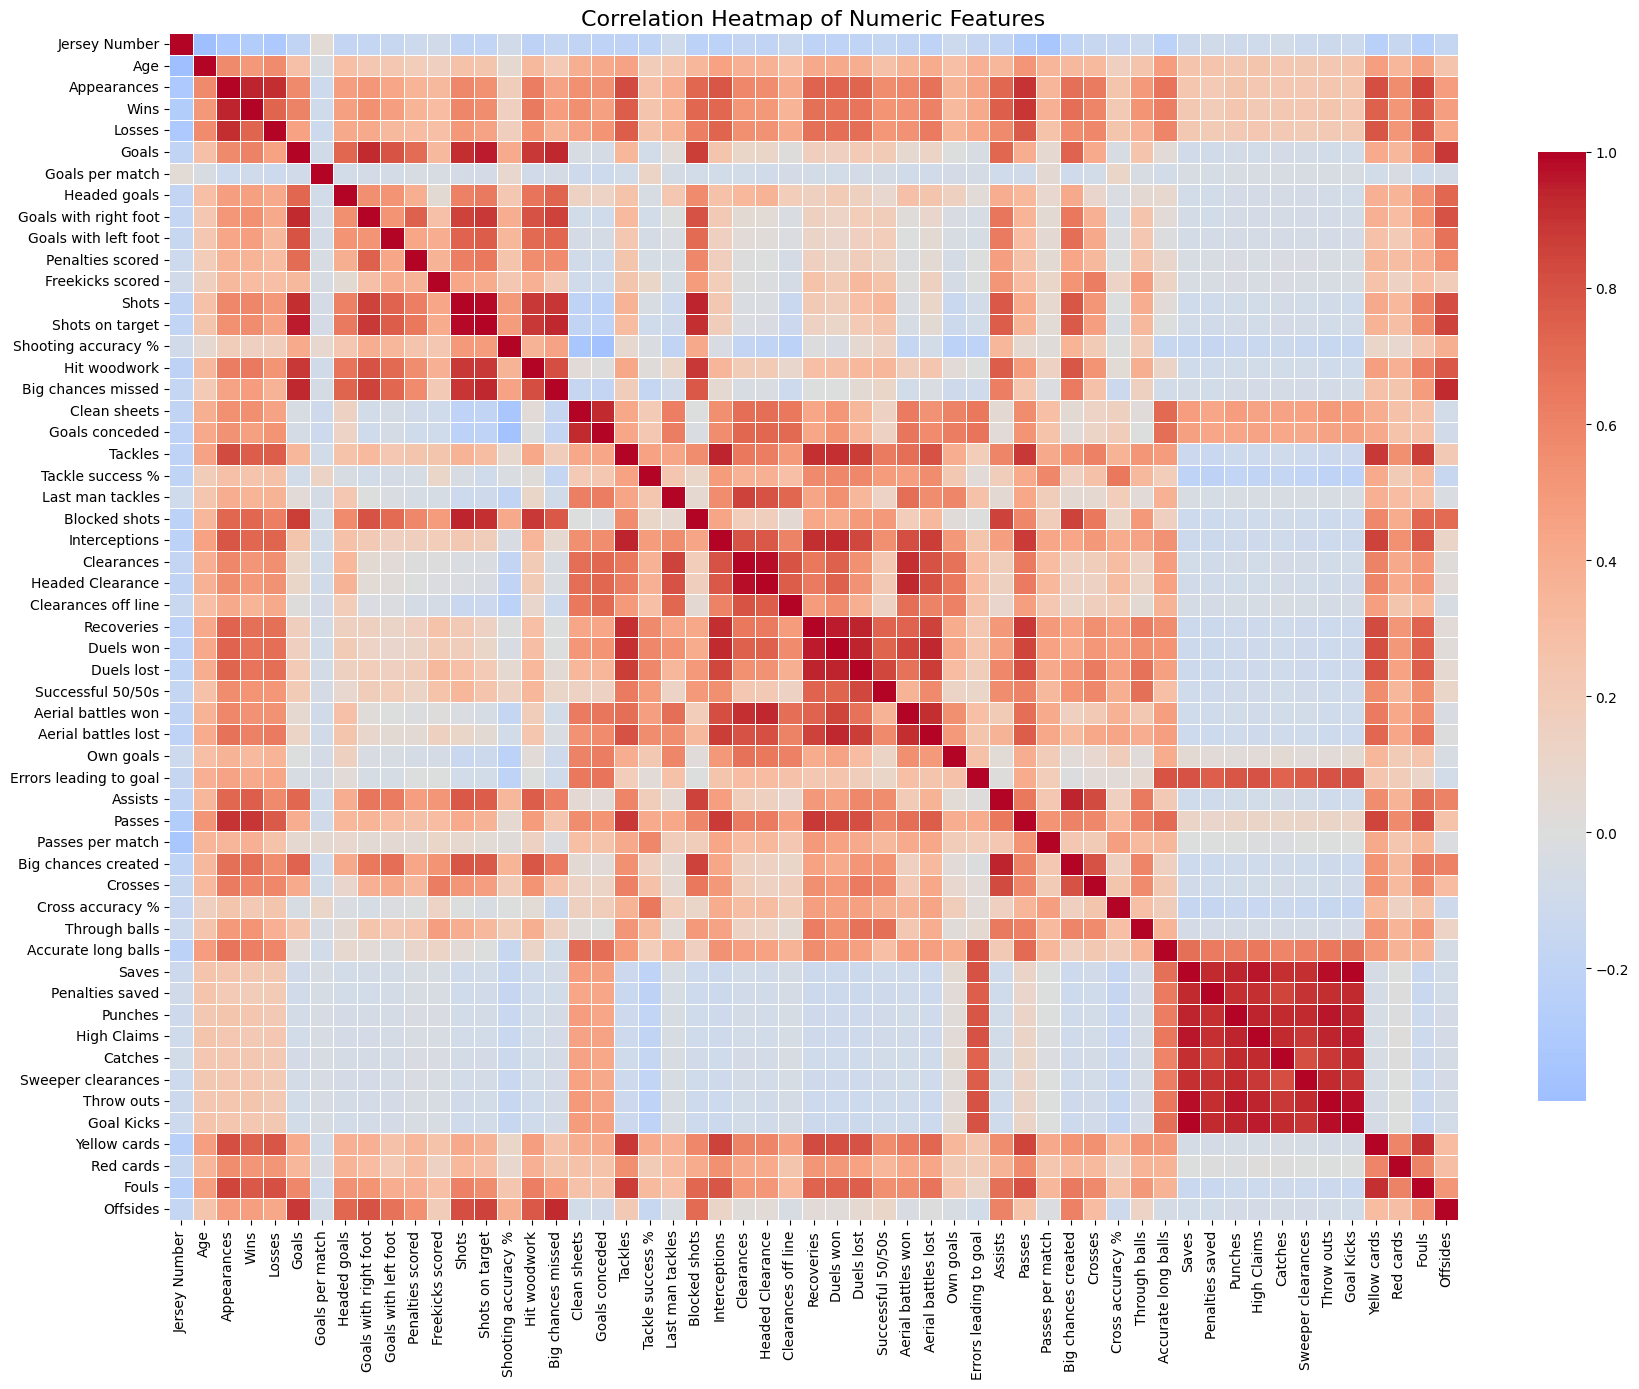

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_df = df.select_dtypes(include=["number"])

# Compute correlation matrix
corr = numeric_df.corr()

# Set up the plot
plt.figure(figsize=(18, 14))
sns.heatmap(
    corr,
    cmap="coolwarm",        # diverging colormap
    center=0,               # center at zero
    annot=False,            # set to True if you want numbers on each cell
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)

plt.title("Correlation Heatmap of Numeric Features", fontsize=16)
plt.tight_layout()
plt.show()

In [22]:
import pandas as pd

# Select only numeric columns
numeric_df = df.select_dtypes(include=["number"])
# Compute correlation matrix
corr = numeric_df.corr().abs() # use absolute values for strength

# Unstack to get pairs
corr_unstacked = corr.unstack()

# Remove self-correlations
corr_unstacked = corr_unstacked[corr_unstacked < 1]

# Sort by correlation strength
top_pairs = corr_unstacked.sort_values(ascending=False).drop_duplicates().head(200)

# Format nicely
top_pairs_df = pd.DataFrame(top_pairs).reset_index()
top_pairs_df.columns = ["Feature1", "Feature2", "Correlation"]

print(top_pairs_df)

               Feature1              Feature2  Correlation
0            Goal Kicks                 Saves     0.997341
1                 Shots       Shots on target     0.986034
2                 Saves            Throw outs     0.980136
3            Clearances      Headed Clearance     0.979649
4            Throw outs            Goal Kicks     0.977353
..                  ...                   ...          ...
195                Wins             Duels won     0.677398
196  Aerial battles won            Duels lost     0.675285
197         Appearances   Aerial battles lost     0.674269
198            Offsides  Goals with left foot     0.674155
199       Through balls            Duels lost     0.673727

[200 rows x 3 columns]


In [23]:
import pandas as pd

# Select only numeric columns
numeric_df = df.select_dtypes(include=["number"])

# Compute correlation matrix (absolute values for strength)
corr = numeric_df.corr().abs()

# Unstack to get feature pairs
corr_unstacked = corr.unstack()

# Remove self-correlations
corr_unstacked = corr_unstacked[corr_unstacked < 1]

# Filter by threshold (e.g. > 0.85)
high_corr = corr_unstacked[corr_unstacked > 0.85]

# Sort by correlation strength
high_corr_sorted = high_corr.sort_values(ascending=False).drop_duplicates()

# Format nicely
high_corr_df = pd.DataFrame(high_corr_sorted).reset_index()
high_corr_df.columns = ["Feature1", "Feature2", "Correlation"]

print(high_corr_df)

               Feature1               Feature2  Correlation
0                 Saves             Goal Kicks     0.997341
1                 Shots        Shots on target     0.986034
2            Throw outs                  Saves     0.980136
3            Clearances       Headed Clearance     0.979649
4            Goal Kicks             Throw outs     0.977353
..                  ...                    ...          ...
71  Aerial battles lost             Recoveries     0.857944
72     Last man tackles             Clearances     0.855844
73      Shots on target               Offsides     0.853625
74              Assists          Blocked shots     0.851190
75                Shots  Goals with right foot     0.851006

[76 rows x 3 columns]


Possible reduced features to use

In [24]:
import pandas as pd

# Select only numeric columns
numeric_df = df.select_dtypes(include=["number"])

# Compute correlation matrix
corr_matrix = numeric_df.corr().abs()

# Threshold for high correlation
threshold = 0.85

# Track features to drop
to_drop = set()

# Iterate through correlation matrix
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if corr_matrix.iloc[i, j] > threshold:
            colname = corr_matrix.columns[i]
            # Drop the later column to avoid redundancy
            to_drop.add(colname)

# Reduced feature set
reduced_features = [col for col in numeric_df.columns if col not in to_drop]

print("Dropped features:", to_drop)
print("Remaining features:", reduced_features)

Dropped features: {'Losses', 'Hit woodwork', 'Aerial battles won', 'Sweeper clearances', 'Goal Kicks', 'Duels won', 'Duels lost', 'Penalties saved', 'Interceptions', 'Aerial battles lost', 'Wins', 'Clearances', 'High Claims', 'Catches', 'Big chances missed', 'Punches', 'Blocked shots', 'Recoveries', 'Goals conceded', 'Headed Clearance', 'Fouls', 'Assists', 'Goals with right foot', 'Offsides', 'Big chances created', 'Throw outs', 'Yellow cards', 'Shots', 'Passes', 'Shots on target'}
Remaining features: ['Jersey Number', 'Age', 'Appearances', 'Goals', 'Goals per match', 'Headed goals', 'Goals with left foot', 'Penalties scored', 'Freekicks scored', 'Shooting accuracy %', 'Clean sheets', 'Tackles', 'Tackle success %', 'Last man tackles', 'Clearances off line', 'Successful 50/50s', 'Own goals', 'Errors leading to goal', 'Passes per match', 'Crosses', 'Cross accuracy %', 'Through balls', 'Accurate long balls', 'Saves', 'Red cards']


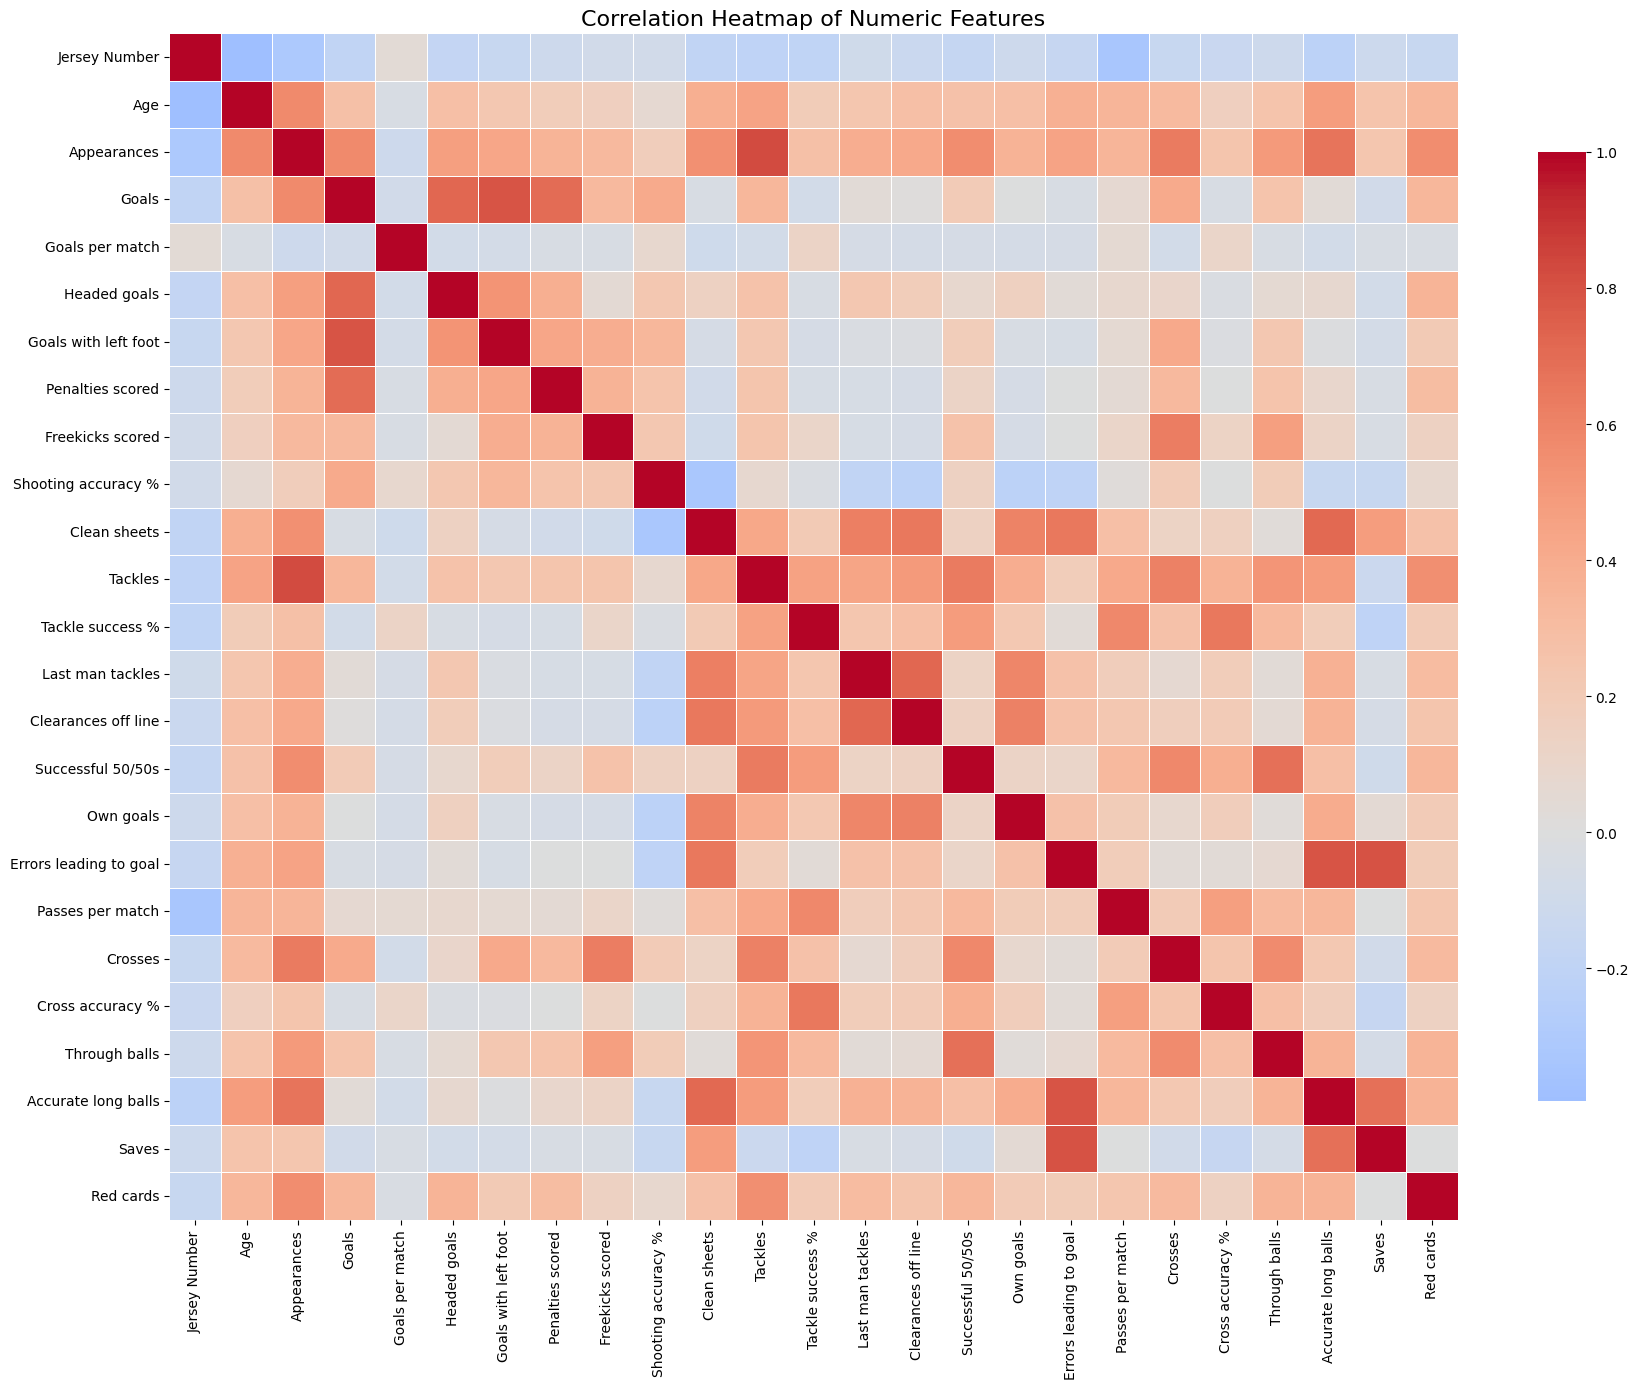

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_df = df[reduced_features]

# Compute correlation matrix
corr = numeric_df.corr()

# Set up the plot
plt.figure(figsize=(18, 14))
sns.heatmap(
    corr,
    cmap="coolwarm",        # diverging colormap
    center=0,               # center at zero
    annot=False,            # set to True if you want numbers on each cell
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)

plt.title("Correlation Heatmap of Numeric Features", fontsize=16)
plt.tight_layout()
plt.show()

### Graphs

In [26]:
reduced_features

['Jersey Number',
 'Age',
 'Appearances',
 'Goals',
 'Goals per match',
 'Headed goals',
 'Goals with left foot',
 'Penalties scored',
 'Freekicks scored',
 'Shooting accuracy %',
 'Clean sheets',
 'Tackles',
 'Tackle success %',
 'Last man tackles',
 'Clearances off line',
 'Successful 50/50s',
 'Own goals',
 'Errors leading to goal',
 'Passes per match',
 'Crosses',
 'Cross accuracy %',
 'Through balls',
 'Accurate long balls',
 'Saves',
 'Red cards']

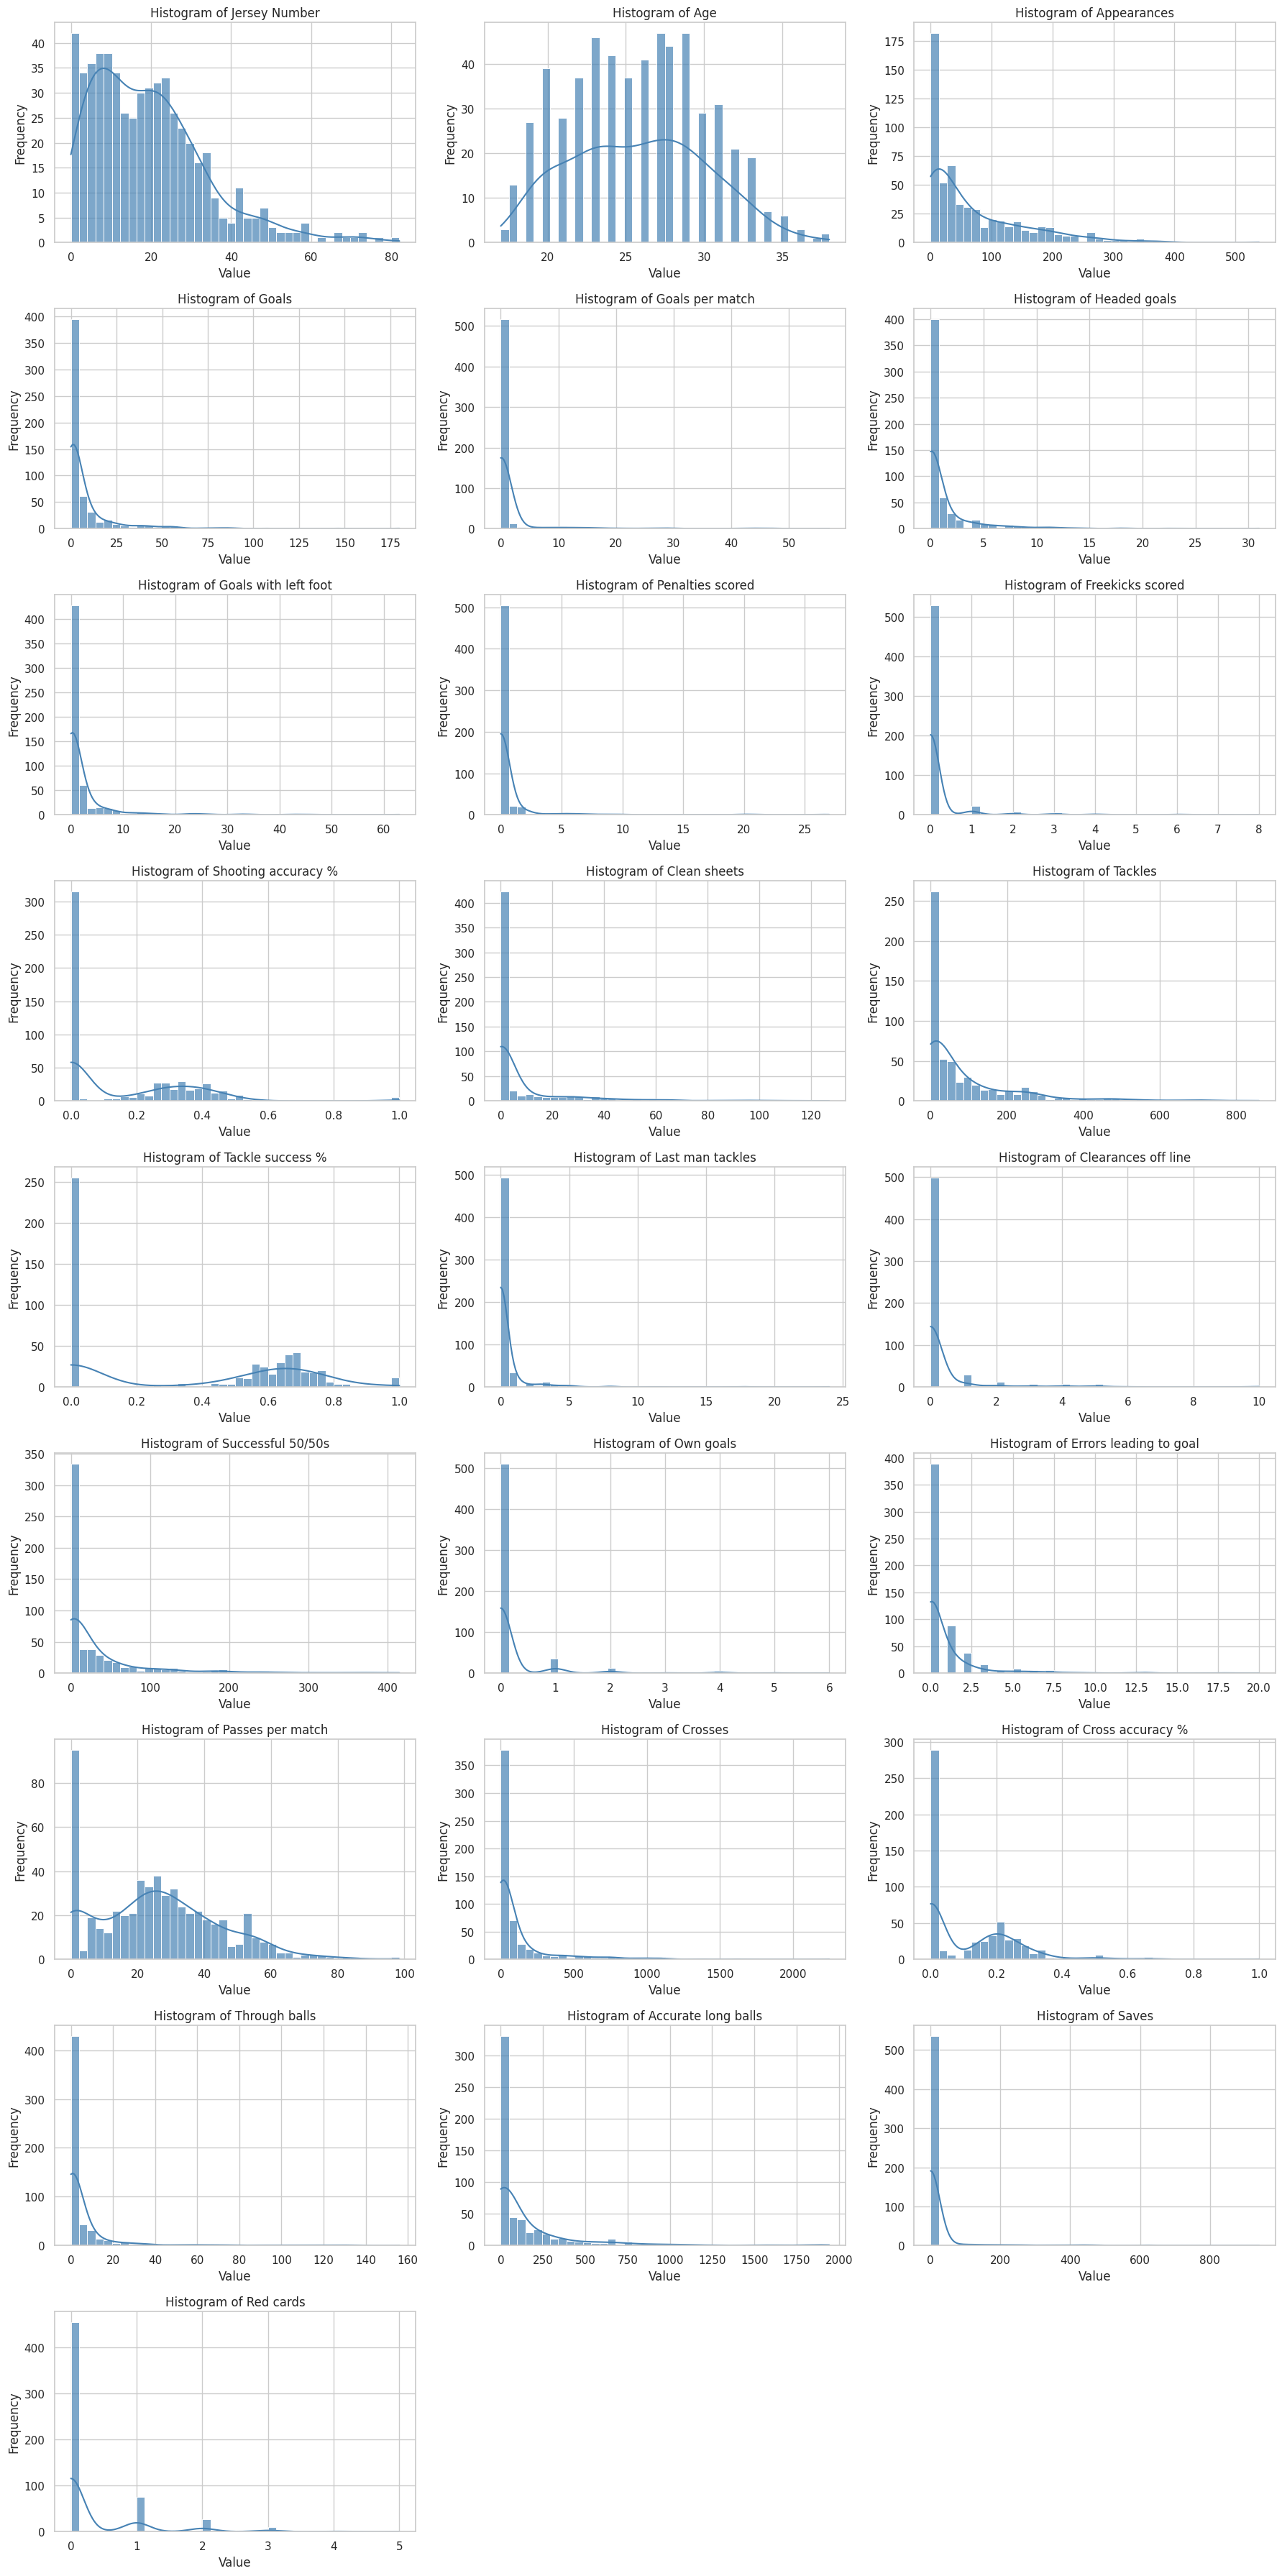

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style="whitegrid")

# Number of features
n_features = len(reduced_features)

# Define grid size (e.g., 3 columns)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
axes = axes.flatten()

# Iterate over each feature
for i, column in enumerate(reduced_features):
    sns.histplot(df[column], bins=40, kde=True, ax=axes[i], color="steelblue", alpha=0.7)
    axes[i].set_title(f"Histogram of {column}", fontsize=12)
    axes[i].set_xlabel("Value")
    axes[i].set_ylabel("Frequency")

# Remove empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Fixing goals per match

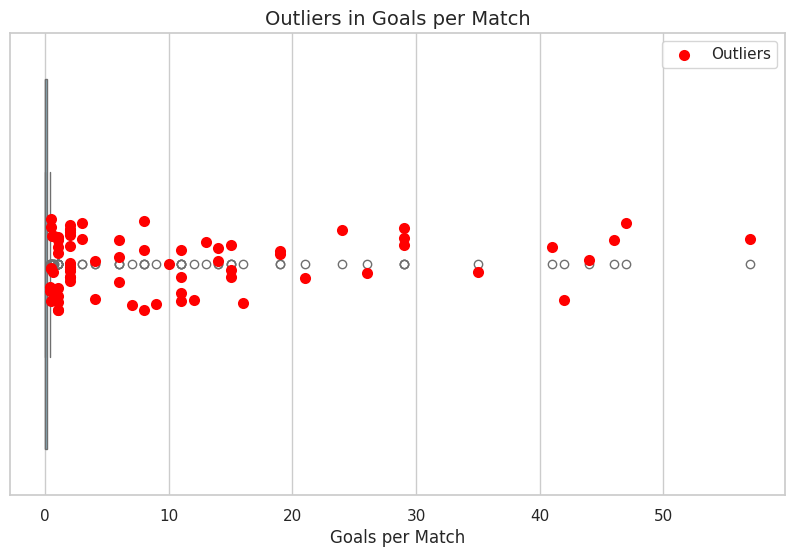

⚽ Outlier players (Goals per Match):


Name                     Club    Position  \
16              Mohamed Elneny                  Arsenal  Midfielder   
18            Matteo Guendouzi                  Arsenal  Midfielder   
19            Emile Smith Rowe                  Arsenal  Midfielder   
22               Dani Ceballos                  Arsenal  Midfielder   
24   Pierre-Emerick Aubameyang                  Arsenal     Forward   
..                         ...                      ...         ...   
541                Josh Cullen          West-Ham-United  Midfielder   
547                Xande Silva          West-Ham-United     Forward   
564                    Vitinha  Wolverhampton-Wanderers  Midfielder   
567               Raúl Jiménez  Wolverhampton-Wanderers     Forward   
569                Fábio Silva  Wolverhampton-Wanderers     Forward   

     Goals per match  
16             47.00  
18             57.00  
19              2.00  
22             26.00  
24              0.63  
..               ...  
541             3.00  
547             1.00  
564             1.00  
567             0.41  
569             1.00  

[75 rows x 4 columns]

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style="whitegrid")

# Focus on Goals_per match
feature = "Goals per match"

# Compute IQR for outlier detection
Q1 = df[feature].quantile(0.25)
Q3 = df[feature].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]

# --- Visualization ---
plt.figure(figsize=(10,6))

# Boxplot with outliers highlighted
sns.boxplot(x=df[feature], color="skyblue")
sns.stripplot(x=outliers[feature], color="red", size=8, label="Outliers")

plt.title("Outliers in Goals per Match", fontsize=14)
plt.xlabel("Goals per Match")
plt.legend()
plt.show()

# Print outlier players for inspection
print("⚽ Outlier players (Goals per Match):")
display(df.loc[outliers.index, ["Name","Club","Position",feature]])

Fixed Goals per Match

In [29]:
print(df["Goals per match"].describe())
print(df.loc[df["Goals per match"] > 2, ["Name","Club","Position","Goals","Appearances","Goals per match"]].head(10))

count    570.000000
mean       1.433965
std        6.033988
min        0.000000
25%        0.000000
50%        0.000000
75%        0.160000
max       57.000000
Name: Goals per match, dtype: float64
                    Name                      Club    Position  Goals  \
16        Mohamed Elneny                   Arsenal  Midfielder      0   
18      Matteo Guendouzi                   Arsenal  Midfielder      0   
22         Dani Ceballos                   Arsenal  Midfielder      0   
46        Henri Lansbury               Aston-Villa  Midfielder      0   
48     Marvelous Nakamba               Aston-Villa  Midfielder      0   
52                  Jota               Aston-Villa  Midfielder      0   
55          Keinan Davis               Aston-Villa     Forward      0   
74   Alexis Mac Allister  Brighton-and-Hove-Albion  Midfielder      0   
79         Steven Alzate  Brighton-and-Hove-Albion  Midfielder      0   
106       Josh Brownhill                   Burnley  Midfielder      0   

In [30]:
import numpy as np

df["Goals per match"] = df["Goals"] / df["Appearances"].where(df["Appearances"] > 0)

In [31]:
df["Goals per match"] = df["Goals per match"].fillna(0)

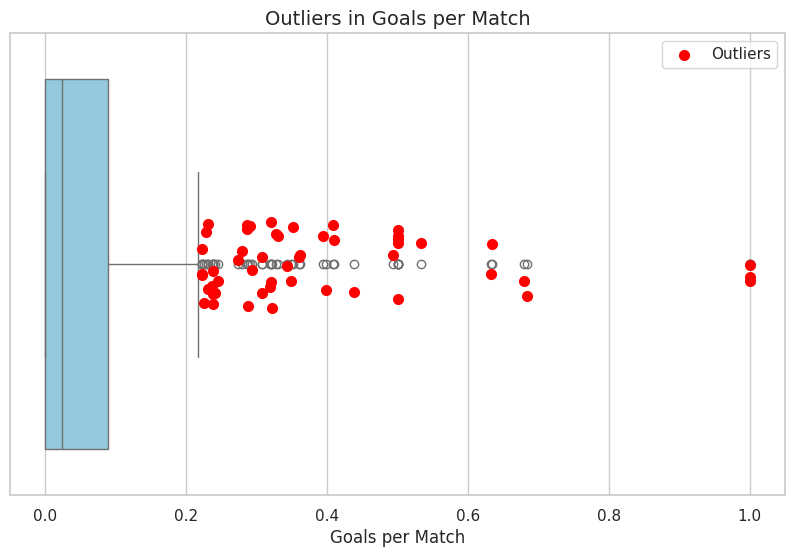

Outlier players (Goals per Match):


Name                      Club    Position  \
12           Gabriel Magalhães                   Arsenal    Defender   
23         Alexandre Lacazette                   Arsenal     Forward   
24   Pierre-Emerick Aubameyang                   Arsenal     Forward   
54                      Wesley               Aston-Villa     Forward   
85                 Neal Maupay  Brighton-and-Hove-Albion     Forward   
101                Jimmy Dunne                   Burnley    Defender   
111                 Chris Wood                   Burnley     Forward   
112              Ashley Barnes                   Burnley     Forward   
113              Jay Rodriguez                   Burnley     Forward   
135          Christian Pulisic                   Chelsea  Midfielder   
139              Tammy Abraham                   Chelsea     Forward   
140             Olivier Giroud                   Chelsea     Forward   
157           Luka Milivojevic            Crystal-Palace  Midfielder   
169          Christian Benteke            Crystal-Palace     Forward   
191            James Rodríguez                   Everton  Midfielder   
196                Richarlison                   Everton     Forward   
197      Dominic Calvert-Lewin                   Everton     Forward   
225        Aleksandar Mitrovic                    Fulham     Forward   
245              Mateusz Klich              Leeds-United  Midfielder   
247              Jack Harrison              Leeds-United  Midfielder   
267           Timothy Castagne            Leicester-City    Defender   
281                Jamie Vardy            Leicester-City     Forward   
284                Ayoze Pérez            Leicester-City     Forward   
308               Harry Wilson                 Liverpool  Midfielder   
312            Roberto Firmino                 Liverpool     Forward   
313                 Sadio Mané                 Liverpool     Forward   
314              Mohamed Salah                 Liverpool     Forward   
319                 Diogo Jota                 Liverpool     Forward   
335            Kevin De Bruyne           Manchester-City  Midfielder   
342            Raheem Sterling           Manchester-City     Forward   
343              Gabriel Jesus           Manchester-City     Forward   
344              Sergio Agüero           Manchester-City     Forward   
345               Riyad Mahrez           Manchester-City     Forward   
364                 Paul Pogba         Manchester-United  Midfielder   
369            Bruno Fernandes         Manchester-United  Midfielder   
373          Donny van de Beek         Manchester-United  Midfielder   
374            Anthony Martial         Manchester-United     Forward   
375            Marcus Rashford         Manchester-United     Forward   
376               Odion Ighalo         Manchester-United     Forward   
377            Mason Greenwood         Manchester-United     Forward   
398          Matthew Longstaff          Newcastle-United  Midfielder   
403               Andy Carroll          Newcastle-United     Forward   
407              Callum Wilson          Newcastle-United     Forward   
457                 Danny Ings               Southampton     Forward   
480                  Dele Alli         Tottenham-Hotspur  Midfielder   
488              Son Heung-Min         Tottenham-Hotspur     Forward   
489                 Harry Kane         Tottenham-Hotspur     Forward   
491                Gareth Bale         Tottenham-Hotspur     Forward   
516            Matheus Pereira      West-Bromwich-Albion     Forward   
517             Charlie Austin      West-Bromwich-Albion     Forward   
543            Michail Antonio           West-Ham-United     Forward   
567               Raúl Jiménez   Wolverhampton-Wanderers     Forward   

     Goals per match  
12          0.500000  
23          0.393939  
24          0.632184  
54          0.238095  
85          0.307692  
101         1.000000  
111         0.342857  
112         0.245161  
11

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style="whitegrid")

# Focus on Goals_per match
feature = "Goals per match"

# Compute IQR for outlier detection
Q1 = df[feature].quantile(0.25)
Q3 = df[feature].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]

# --- Visualization ---
plt.figure(figsize=(10,6))

# Boxplot with outliers highlighted
sns.boxplot(x=df[feature], color="skyblue")
sns.stripplot(x=outliers[feature], color="red", size=8, label="Outliers")

plt.title("Outliers in Goals per Match", fontsize=14)
plt.xlabel("Goals per Match")
plt.legend()
plt.show()

# Print outlier players for inspection
print("Outlier players (Goals per Match):")
display(df.loc[outliers.index, ["Name","Club","Position",feature]])

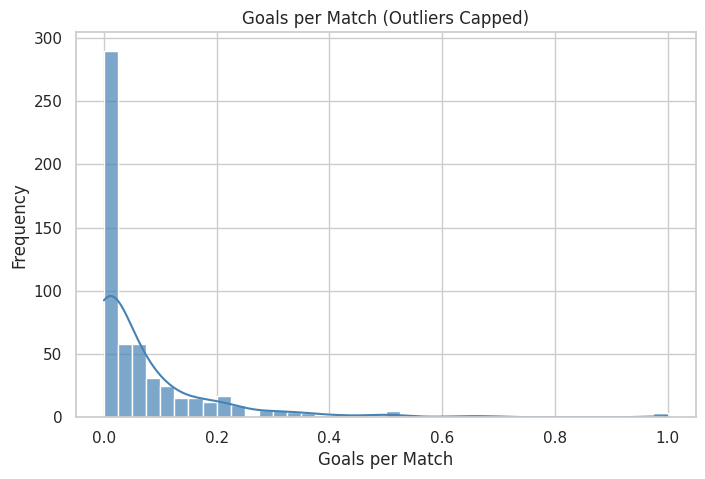

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.histplot(df[feature], bins=40, kde=True, color="steelblue", alpha=0.7)
plt.title("Goals per Match (Outliers Capped)")
plt.xlabel("Goals per Match")
plt.ylabel("Frequency")
plt.show()

In [34]:
# Select categorical columns
cat_df = df.select_dtypes(include=["object", "category"])

# Get the list of categorical column names
cat_list = list(cat_df.columns)

print("Categorical columns:", cat_list)

Categorical columns: ['Name', 'Club', 'Position', 'Nationality']


/tmp/ipython-input-1066548937.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-1066548937.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


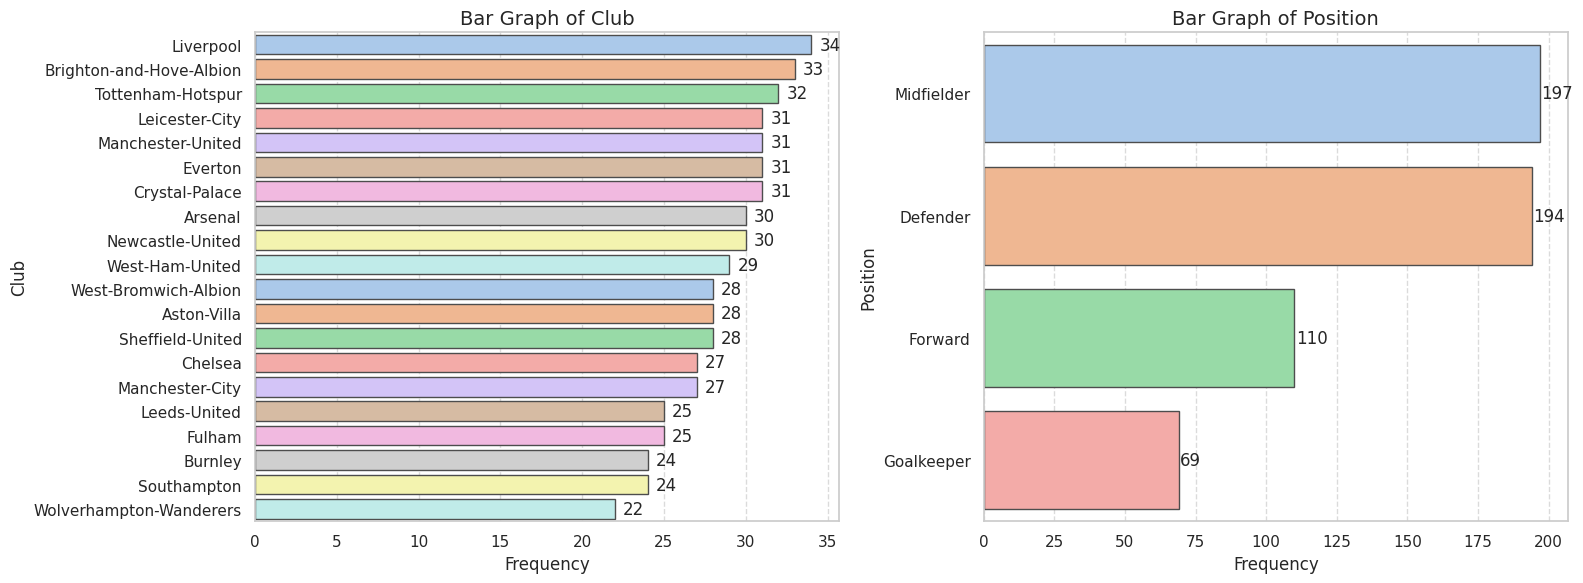

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Define the categorical columns you want
cat_cols = ["Club", "Position"]

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

for i, col in enumerate(cat_cols):
    counts = df[col].value_counts().reset_index()
    counts.columns = [col, "Frequency"]

    # Horizontal bar plot for readability
    sns.barplot(
        data=counts,
        y=col,
        x="Frequency",
        palette="pastel",
        ax=axes[i],
        edgecolor=".3"
    )

    axes[i].set_title(f"Bar Graph of {col}", fontsize=14)
    axes[i].set_xlabel("Frequency", fontsize=12)
    axes[i].set_ylabel(col, fontsize=12)
    axes[i].grid(True, axis="x", linestyle="--", alpha=0.7)

    # Annotate counts on bars
    for p in axes[i].patches:
        width = p.get_width()
        axes[i].text(width + 0.5, p.get_y() + p.get_height()/2,
                     int(width), va="center")

plt.tight_layout()
plt.show()

/tmp/ipython-input-1958091549.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


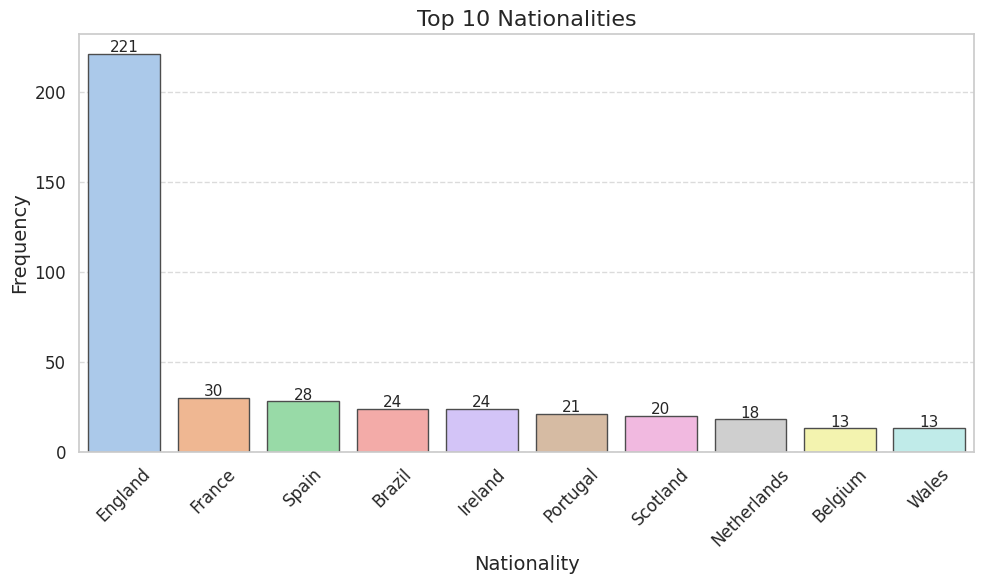

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Get top 10 nationalities
top_nationalities = df["Nationality"].value_counts().nlargest(10).reset_index()
top_nationalities.columns = ["Nationality", "Frequency"]

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_nationalities,
    x="Nationality",
    y="Frequency",
    palette="pastel",
    edgecolor=".3"
)

plt.title("Top 10 Nationalities", fontsize=16)
plt.xlabel("Nationality", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, axis="y", linestyle="--", alpha=0.7)

# Annotate counts on bars
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width()/2, height + 1,
                   int(height), ha="center", fontsize=11)

plt.tight_layout()
plt.show()

## Finding outliers

In [37]:
def boxplot_for_outlier(df, columns):
    count = 0
    fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(20, 12))

    for i in range(3):
        for j in range(4):
            if count < len(columns):
                sns.boxplot(x=df[columns[count]], palette="Wistia", ax=ax[i][j])
                count += 1
            else:
                ax[i][j].axis('off')  # Turn off axes for empty subplots

    plt.tight_layout()
    plt.show()


## Player positon division and normalization by appearances

/tmp/ipython-input-1711023981.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=position_col, y=col, data=df, palette="Set2", ax=ax[i])
/tmp/ipython-input-1711023981.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=position_col, y=col, data=df, palette="Set2", ax=ax[i])
/tmp/ipython-input-1711023981.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=position_col, y=col, data=df, palette="Set2", ax=ax[i])
/tmp/ipython-input-1711023981.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be re

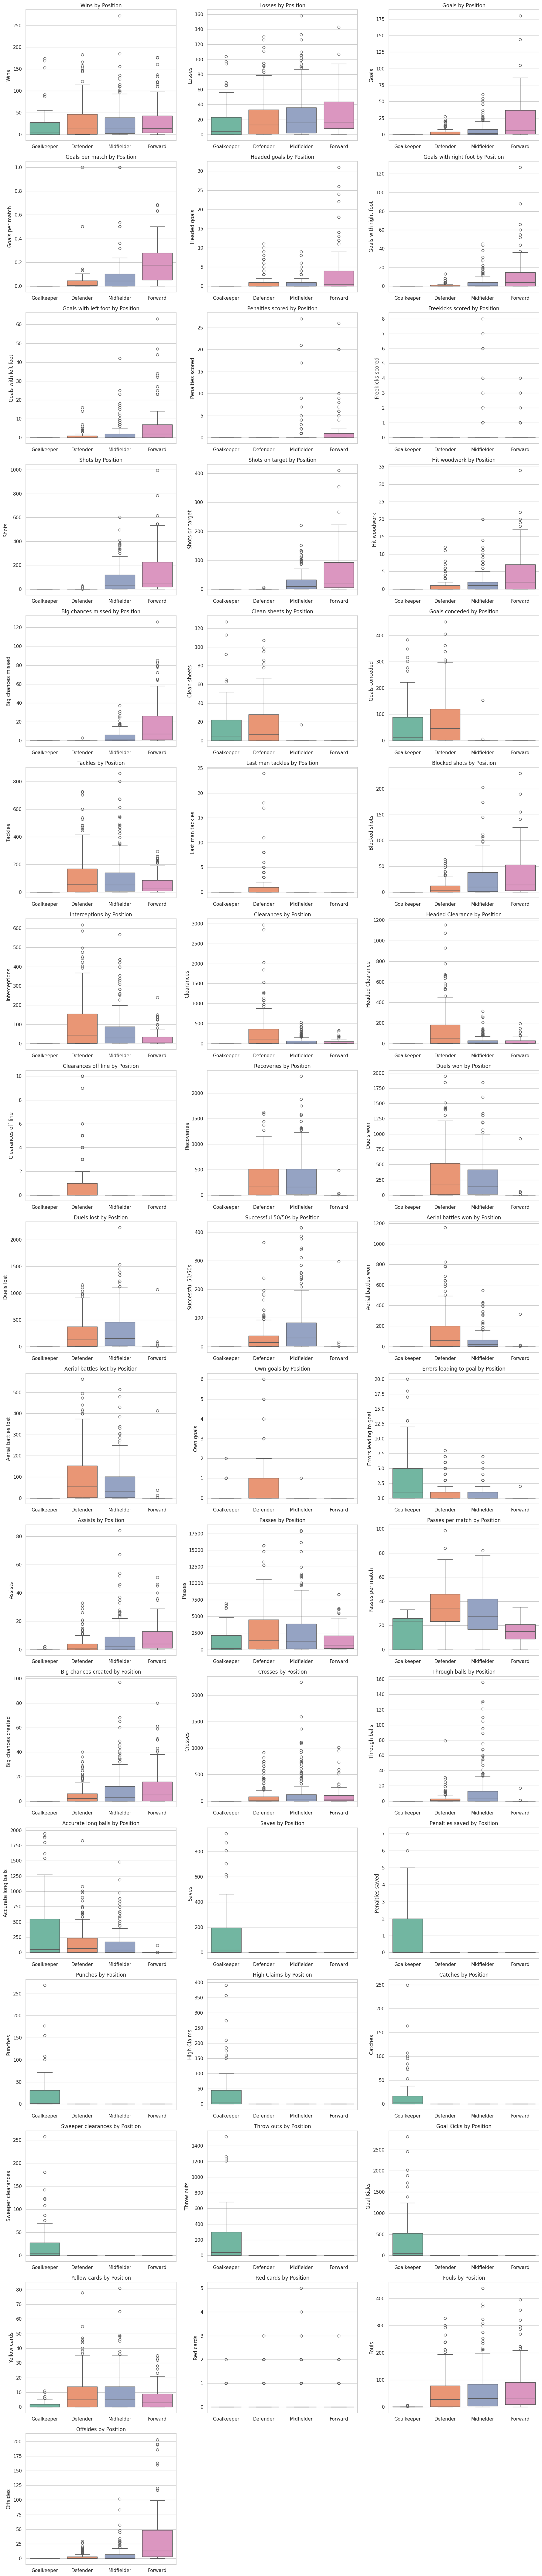

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

features = df.columns

cols = features.drop([
    'Age', 'Name', 'Appearances', 'Club', 'Nationality', 'Jersey Number',
    'Cross accuracy %', 'Position', 'Tackle success %', 'Shooting accuracy %',
])

def boxplot_by_position(df, columns, position_col='Position', cols_per_row=3):
    n = len(columns)
    rows = math.ceil(n / cols_per_row)

    fig, ax = plt.subplots(nrows=rows, ncols=cols_per_row, figsize=(6*cols_per_row, 5*rows))
    ax = ax.flatten()

    for i, col in enumerate(columns):
        sns.boxplot(x=position_col, y=col, data=df, palette="Set2", ax=ax[i])
        ax[i].set_title(f"{col} by {position_col}")
        ax[i].set_xlabel("")  # cleaner x-axis

    # turn off unused subplots
    for j in range(i+1, len(ax)):
        ax[j].axis('off')

    plt.tight_layout()
    plt.show()

# Plot grouped boxplots
boxplot_by_position(df, cols, position_col='Position')

In [39]:
# Copy data and remove players with zero appearances.

features = df.columns
data_clean = df[features]
data_clean.head()

data_clean_appNonZero = data_clean[data_clean['Appearances'] > 0] #prevents division by zero for players who are yet to make appearances

In [40]:
# selecting numeric performance features (excluding identifiers and percentage stats).
# Converting them to floats.
# Normalizing them by dividing through the number of appearances, so you get per‑appearance averages instead of raw totals.
cols = features.drop([
    'Age', 'Name', 'Appearances', 'Club', 'Nationality', 'Jersey Number',
    'Cross accuracy %', 'Position', 'Tackle success %', 'Shooting accuracy %',
    'Passes per match','Goals per match'
])


print("\nNormalized columns per appearance:")
for i, col in enumerate(cols, 1):
    print(f"{i}. {col}")

data_clean_appNonZero = data_clean_appNonZero.copy()

data_clean_appNonZero[cols] = data_clean_appNonZero[cols].astype(float)
data_clean_appNonZero[cols] = data_clean_appNonZero[cols].div(
    data_clean_appNonZero['Appearances'], axis=0
)


Normalized columns per appearance:
1. Wins
2. Losses
3. Goals
4. Headed goals
5. Goals with right foot
6. Goals with left foot
7. Penalties scored
8. Freekicks scored
9. Shots
10. Shots on target
11. Hit woodwork
12. Big chances missed
13. Clean sheets
14. Goals conceded
15. Tackles
16. Last man tackles
17. Blocked shots
18. Interceptions
19. Clearances
20. Headed Clearance
21. Clearances off line
22. Recoveries
23. Duels won
24. Duels lost
25. Successful 50/50s
26. Aerial battles won
27. Aerial battles lost
28. Own goals
29. Errors leading to goal
30. Assists
31. Passes
32. Big chances created
33. Crosses
34. Through balls
35. Accurate long balls
36. Saves
37. Penalties saved
38. Punches
39. High Claims
40. Catches
41. Sweeper clearances
42. Throw outs
43. Goal Kicks
44. Yellow cards
45. Red cards
46. Fouls
47. Offsides


In [41]:
# positional classifications on the data as is
goalies = df[(df['Position'] == 'Goalkeeper') & (df['Appearances'] > 0)]
defenders = df[(df['Position'] == 'Defender') & (df['Appearances'] > 0)]
midfielders = df[(df['Position'] == 'Midfielder') & (df['Appearances'] > 0)]
forwards = df[(df['Position'] == 'Forward') & (df['Appearances'] > 0)]

In [42]:
#Create subsets by position and filter for players with ≥ 38 games.
# split players by position and made atleast 38 games (a seasons worth games)
# baseline counts and subsets from raw totals.
data_38app = df[df['Appearances'] >=38]
goalies_38app = goalies[goalies['Appearances'] >= 38]
defenders_38app = defenders[defenders['Appearances'] >= 38]
midfilders_38app = midfielders[midfielders['Appearances'] >= 38]
forwards_38app = forwards[forwards['Appearances'] >= 38]

# Print sizes
print("Number of players with >=38 appearances (all):", data_38app.shape[0])
print("Goalkeepers with >=38 appearances:", goalies_38app.shape[0])
print("Defenders with >=38 appearances:", defenders_38app.shape[0])
print("Midfielders with >=38 appearances:", midfilders_38app.shape[0])
print("Forwards with >=38 appearances:", forwards_38app.shape[0])


Number of players with >=38 appearances (all): 281
Goalkeepers with >=38 appearances: 25
Defenders with >=38 appearances: 97
Midfielders with >=38 appearances: 102
Forwards with >=38 appearances: 57


In [43]:
#Step 6: Do the same filtering on normalized stats for fair comparisons
# data normalized
all_players = data_clean_appNonZero[data_clean_appNonZero['Appearances'] >= 38]
goalies_ = data_clean_appNonZero[(data_clean_appNonZero['Position'] == 'Goalkeeper') & (data_clean_appNonZero['Appearances'] >= 38)]
defenders_ = data_clean_appNonZero[(data_clean_appNonZero['Position'] == 'Defender') & (data_clean_appNonZero['Appearances'] >= 38)]
midfielders_ = data_clean_appNonZero[(data_clean_appNonZero['Position'] == 'Midfielder') & (data_clean_appNonZero['Appearances'] >= 38)]
forwards_ = data_clean_appNonZero[(data_clean_appNonZero['Position'] == 'Forward') & (data_clean_appNonZero['Appearances'] >= 38)]

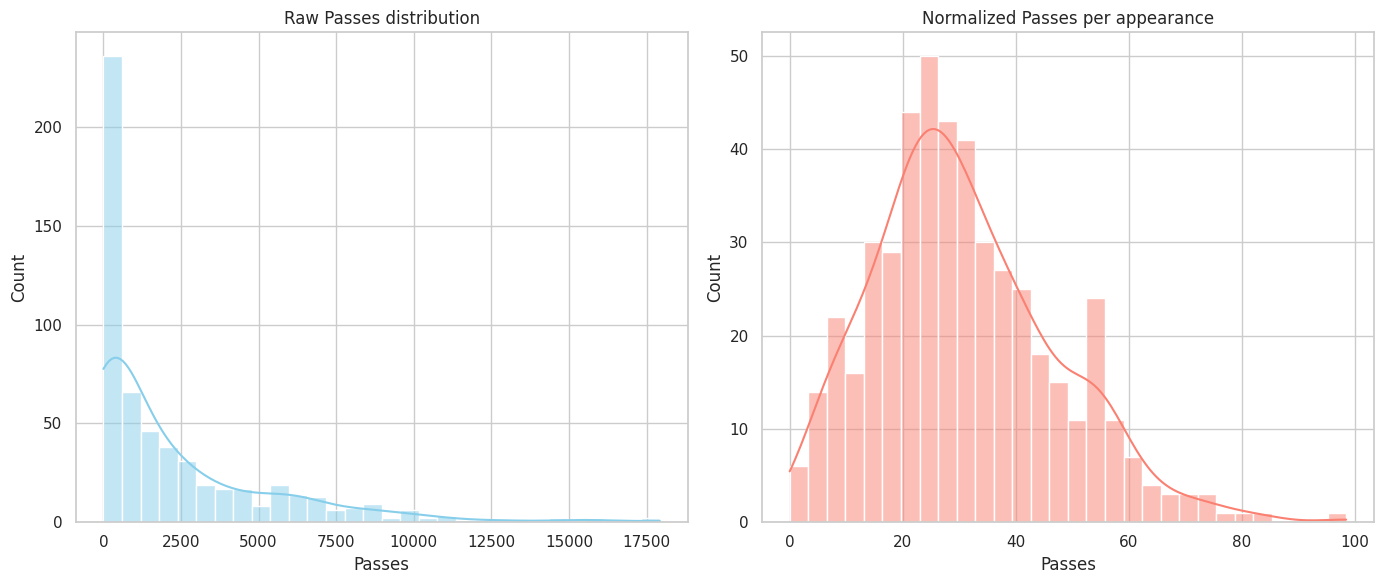

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pick a feature to compare raw vs normalized
feature = "Passes"   # replace with any numeric column you normalized

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Raw distribution
sns.histplot(df[feature], bins=30, kde=True, ax=axes[0], color="skyblue")
axes[0].set_title(f"Raw {feature} distribution")

# Normalized distribution (per appearance)
sns.histplot(data_clean_appNonZero[feature], bins=30, kde=True, ax=axes[1], color="salmon")
axes[1].set_title(f"Normalized {feature} per appearance")

plt.tight_layout()
plt.show()

## Outliers after normalization by appearances



/tmp/ipython-input-3956908814.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=position_col, y=col, data=df, palette="Set2", ax=ax[i])
/tmp/ipython-input-3956908814.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=position_col, y=col, data=df, palette="Set2", ax=ax[i])
/tmp/ipython-input-3956908814.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=position_col, y=col, data=df, palette="Set2", ax=ax[i])
/tmp/ipython-input-3956908814.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be re

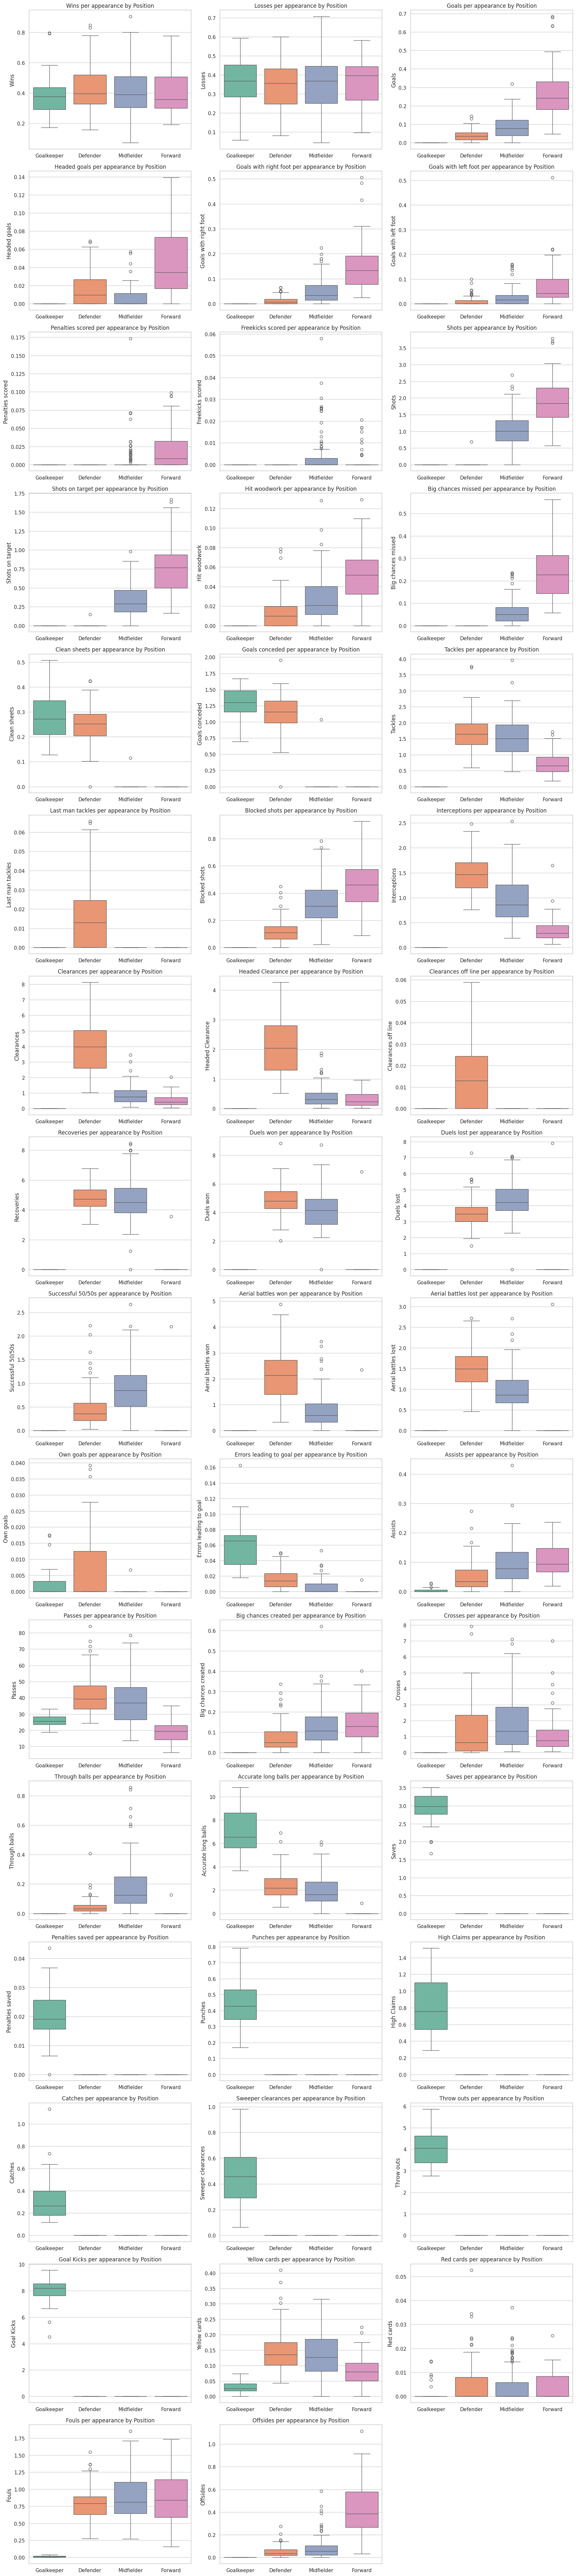

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

def boxplot_by_position(df, columns, position_col='Position', cols_per_row=3):
    n = len(columns)
    rows = math.ceil(n / cols_per_row)

    fig, ax = plt.subplots(nrows=rows, ncols=cols_per_row, figsize=(6*cols_per_row, 5*rows))
    ax = ax.flatten()

    for i, col in enumerate(columns):
        sns.boxplot(x=position_col, y=col, data=df, palette="Set2", ax=ax[i])
        ax[i].set_title(f"{col} per appearance by {position_col}")
        ax[i].set_xlabel("")  # cleaner x-axis

    # turn off unused subplots
    for j in range(i+1, len(ax)):
        ax[j].axis('off')

    plt.tight_layout()
    plt.show()

# Use normalized dataset, filtered to ≥38 appearances
normalized_cols = cols  # from your pipeline

boxplot_by_position(all_players, normalized_cols, position_col='Position')

/tmp/ipython-input-3217505260.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=position_col, y=col, data=df, palette="Set2", ax=ax[i])
/tmp/ipython-input-3217505260.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=position_col, y=col, data=df, palette="Set2", ax=ax[i])
/tmp/ipython-input-3217505260.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=position_col, y=col, data=df, palette="Set2", ax=ax[i])
/tmp/ipython-input-3217505260.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be re

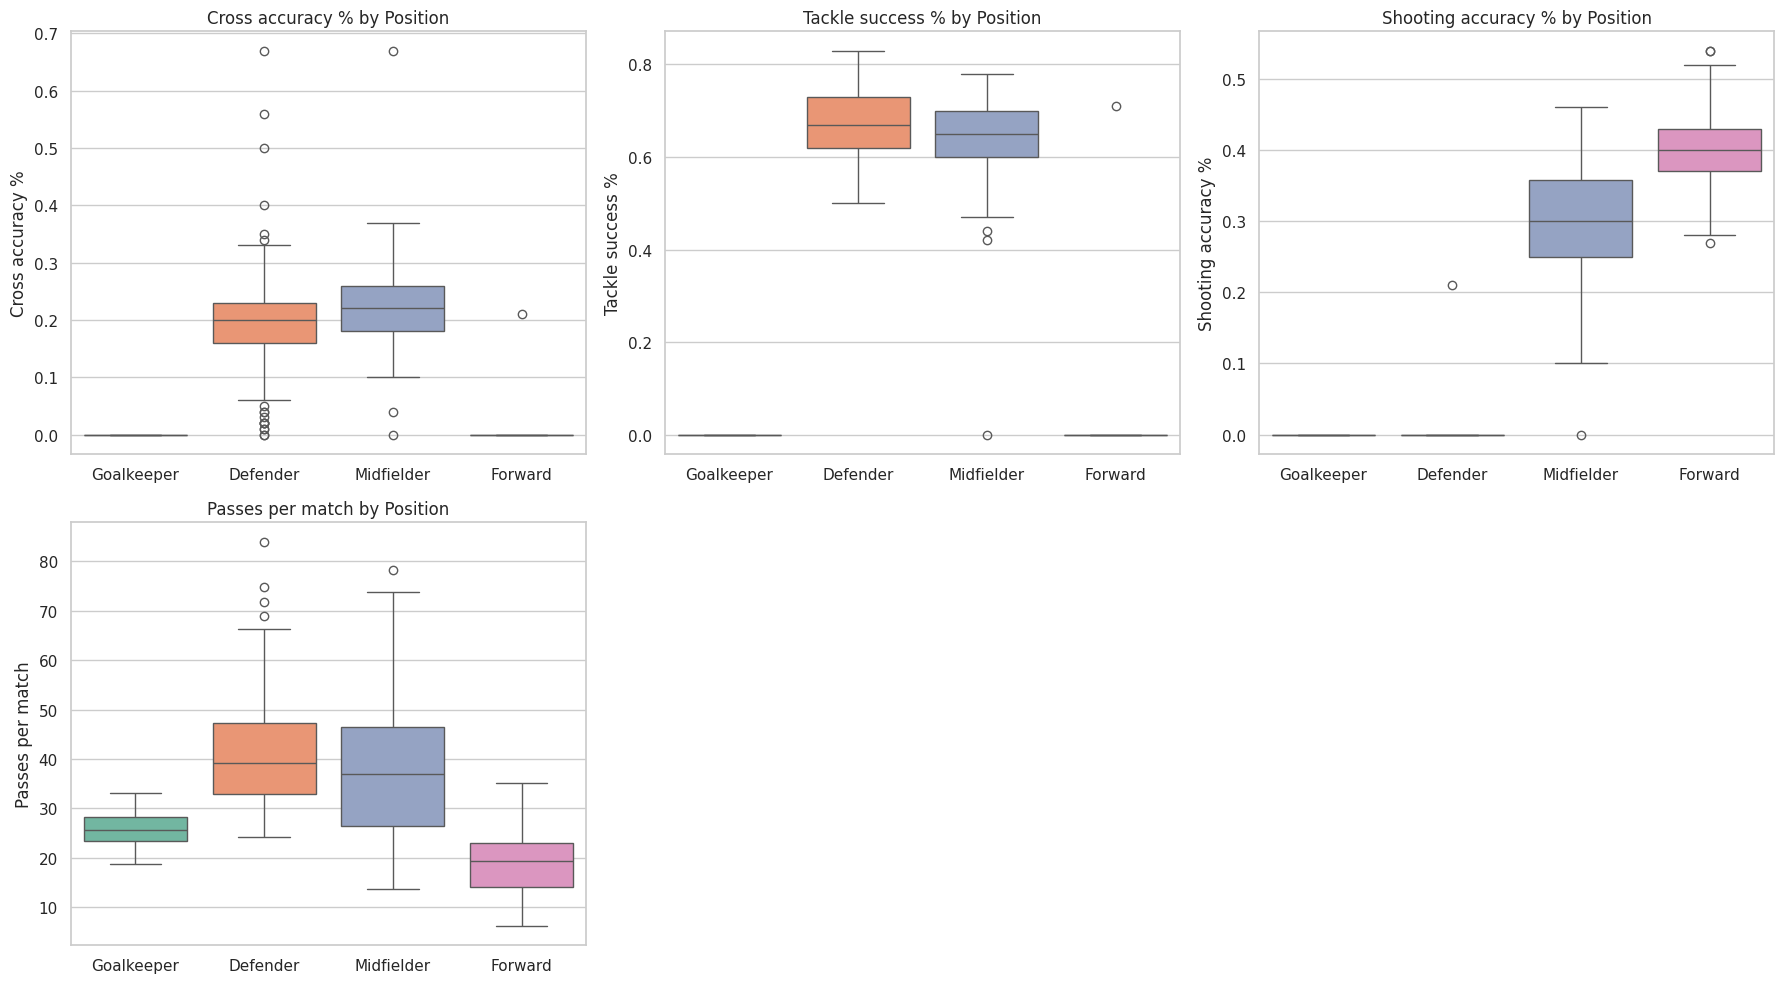

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

def boxplot_by_position(df, columns, position_col='Position', cols_per_row=3):
    n = len(columns)
    rows = math.ceil(n / cols_per_row)

    fig, ax = plt.subplots(nrows=rows, ncols=cols_per_row, figsize=(6*cols_per_row, 5*rows))
    ax = ax.flatten()

    for i, col in enumerate(columns):
        sns.boxplot(x=position_col, y=col, data=df, palette="Set2", ax=ax[i])
        ax[i].set_title(f"{col} by {position_col}")
        ax[i].set_xlabel("")  # cleaner x-axis

    # turn off unused subplots
    for j in range(i + 1, len(ax)):
        ax[j].axis('off')

    plt.tight_layout()
    plt.show()

# cols = features.drop([
#     'Age', 'Name', 'Appearances', 'Club', 'Nationality', 'Jersey Number',
#     'Cross accuracy %', 'Position', 'Tackle success %', 'Shooting accuracy %',
#     'Passes per match'
# ])

# --- Build the list of percentage columns only ---
percentage_cols = [
    'Cross accuracy %',
    'Tackle success %',
    'Shooting accuracy %',
    'Passes per match']

# --- Plot only the percentage features ---
boxplot_by_position(all_players, percentage_cols, position_col='Position')

## Outlier Capping

/tmp/ipython-input-3328688549.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[184.    63.    54.    47.    57.   132.    71.    99.    52.    93.
 198.    92.   100.   264.    96.    61.   142.   222.    70.   166.
 202.    78.    64.    39.   121.    46.   197.   211.   148.   282.
 258.   185.   284.    48.   106.   131.    46.    41.    43.    47.
  58.   132.    52.    69.   258.    57.    42.   122.    44.    58.
 181.   425.75  45.   342.   196.   115.   102.   156.   105.   225.
  42.   112.   262.   133.    45.    46.   208.    59.   215.   128.
  82.    48.    80.   124.   121.    39.   167.   183.   233.    60.
  70.   208.    96.   155.   176.   235.    41.   157.   111.   180.
 110.    63.   122.   160.   383.    38.   182.   101.    75.    54.
  78.    59.  ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  all_players.loc[mask, col] = all_playe

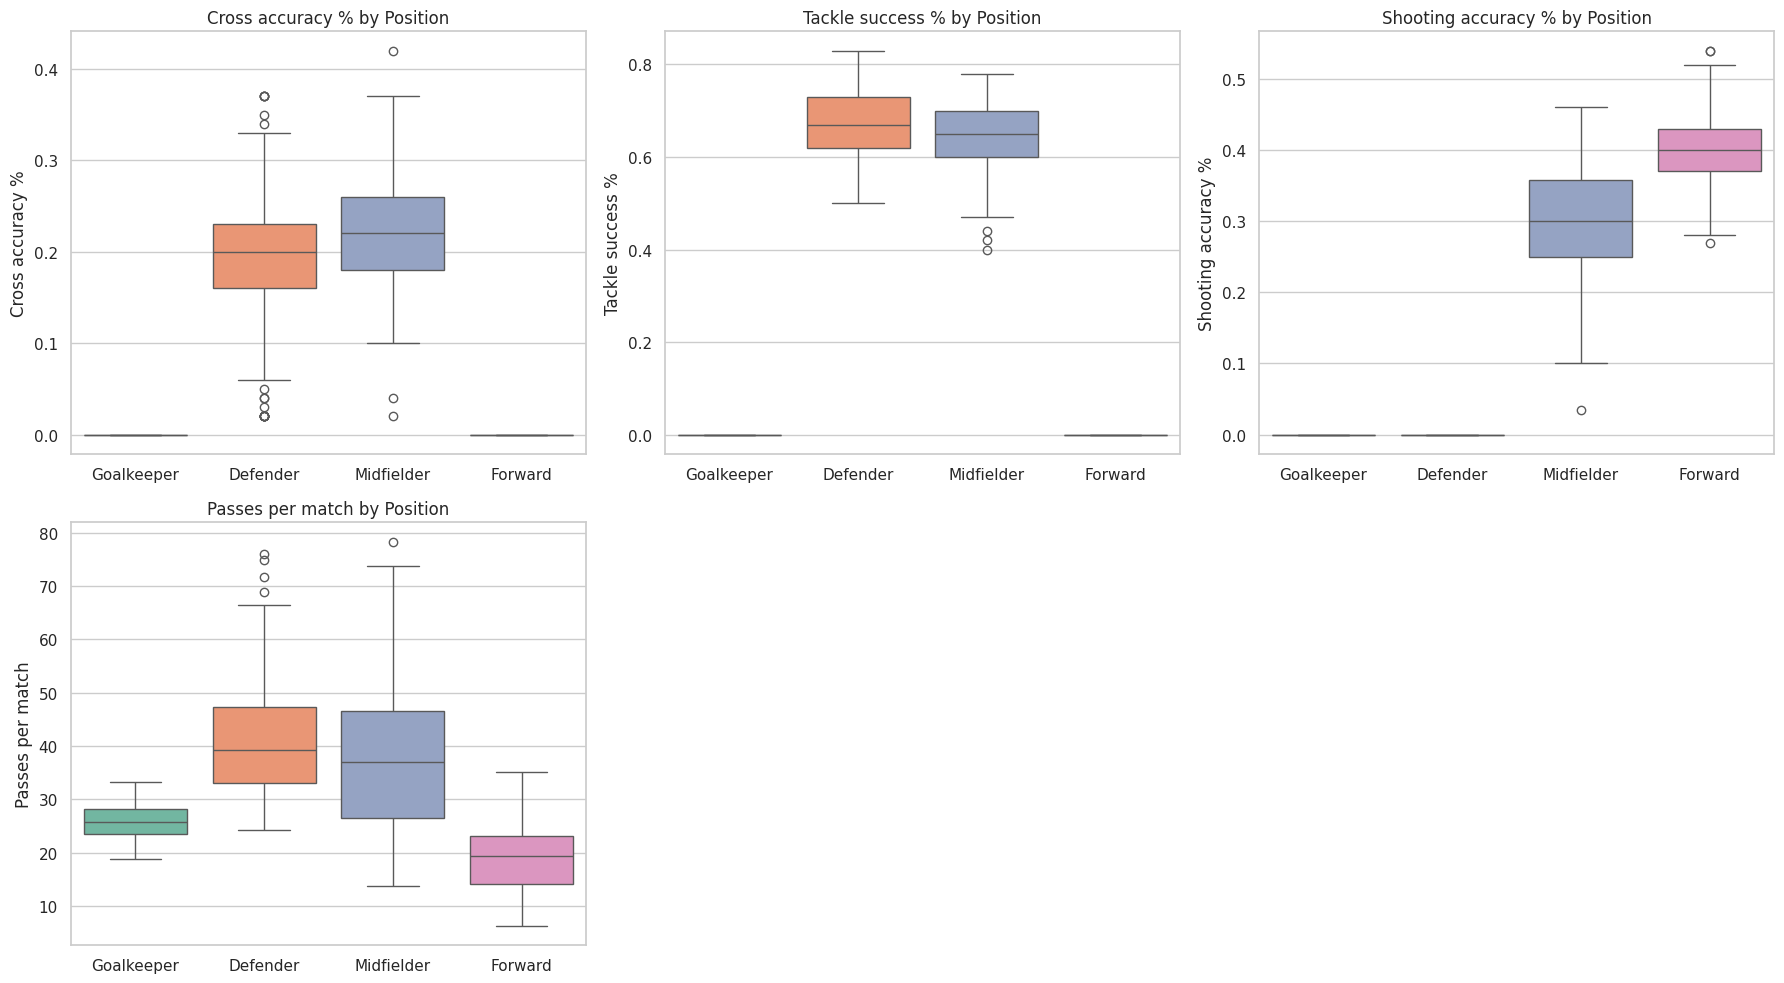

In [47]:
# Apply clamping to numeric columns by position
numeric_cols = all_players.select_dtypes(include='number').columns.tolist()
iqr_multiplier = 2.0

for col in numeric_cols:
    # group by Position and clamp within each group
    for pos, group in all_players.groupby('Position'):
        q1 = group[col].quantile(0.25)
        q3 = group[col].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - iqr_multiplier * iqr
        upper = q3 + iqr_multiplier * iqr
        # clip only rows belonging to this position
        mask = all_players['Position'] == pos
        all_players.loc[mask, col] = all_players.loc[mask, col].clip(lower, upper)

# Now plot with clamped values
boxplot_by_position(all_players, percentage_cols, position_col='Position')

/tmp/ipython-input-3217505260.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=position_col, y=col, data=df, palette="Set2", ax=ax[i])
/tmp/ipython-input-3217505260.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=position_col, y=col, data=df, palette="Set2", ax=ax[i])
/tmp/ipython-input-3217505260.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=position_col, y=col, data=df, palette="Set2", ax=ax[i])
/tmp/ipython-input-3217505260.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be re

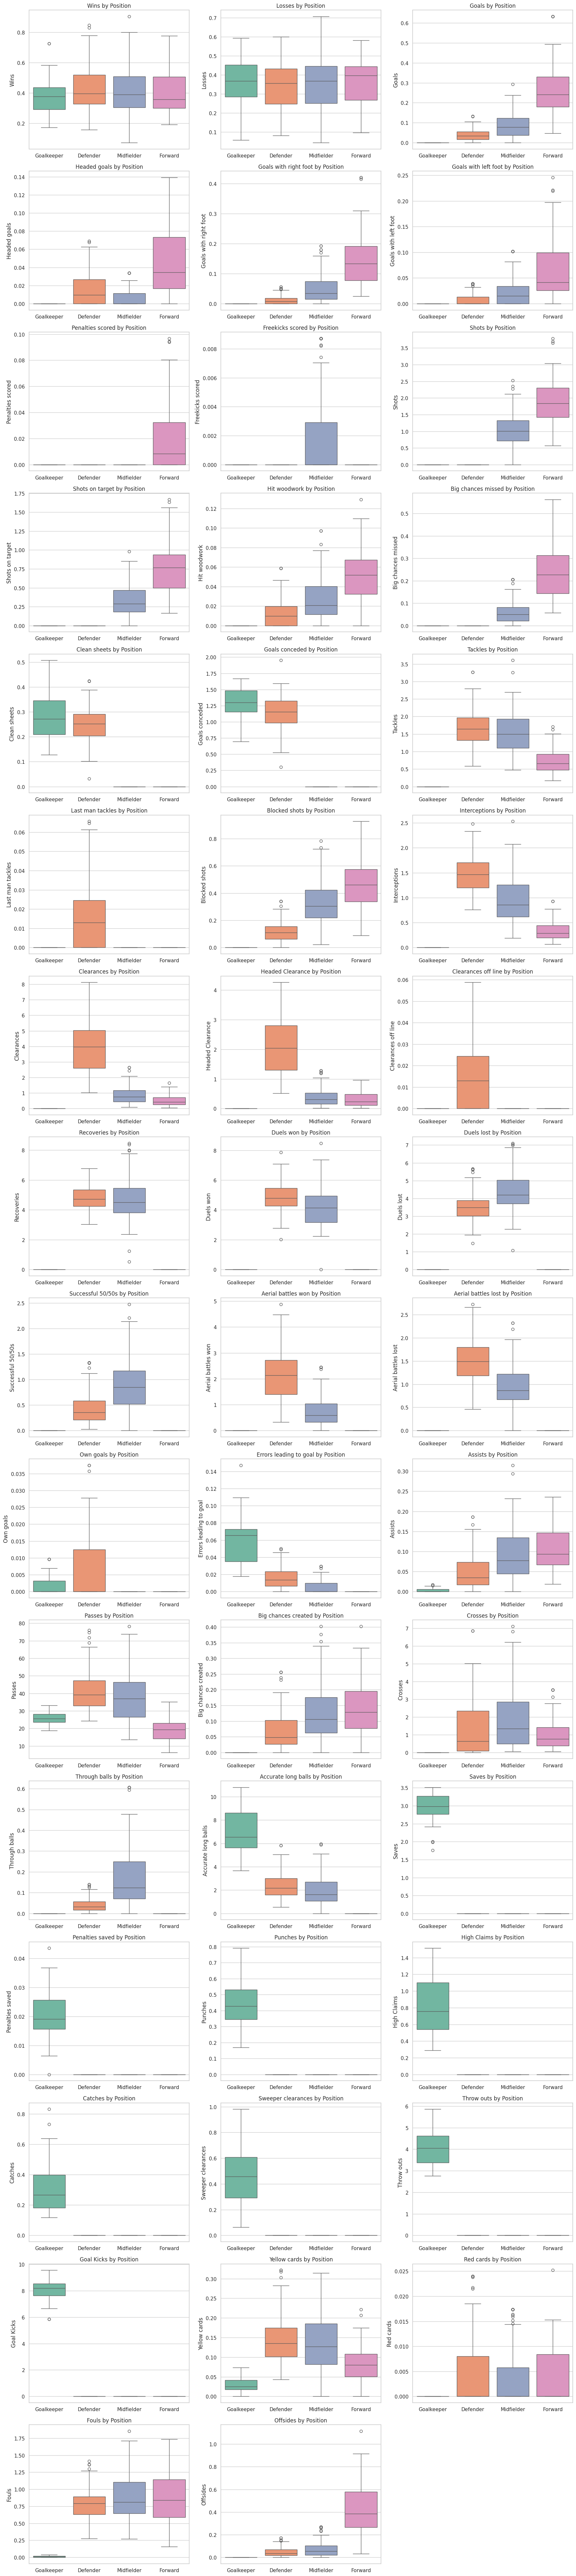

In [48]:
boxplot_by_position(all_players,normalized_cols , position_col='Position')

# Models

## John's Work

### Predicting performance label using 1:Good 0:Bad Using Decision Tree, Random Forest, KNN, SVM

In [49]:
print([col for col in df.columns if "block" in col.lower()])
print([col for col in df.columns if "aerial" in col.lower()])
print([col for col in df.columns if "clear" in col.lower()])
print([col for col in df.columns if "inter" in col.lower()])
print([col for col in df.columns if "tack" in col.lower()])

['Blocked shots']
['Aerial battles won', 'Aerial battles lost']
['Clearances', 'Headed Clearance', 'Clearances off line', 'Sweeper clearances']
['Interceptions']
['Tackles', 'Tackle success %', 'Last man tackles']


In [50]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# store performance indices
all_players['PerformanceIndex'] = np.nan

#attackers
attackers = all_players[all_players['Position'] == 'Forward']

attacker_features = [
    "Goals",
    "Assists",
    "Shots",
    "Shots on target",
    "Big chances created",
    "Crosses",
    "Cross accuracy %"
]

atk = attackers[attacker_features].fillna(0)
atk_scaled = StandardScaler().fit_transform(atk)
atk_index = atk_scaled.sum(axis=1)

all_players.loc[attackers.index, 'PerformanceIndex'] = atk_index

#midfielders
midfield = all_players[all_players['Position'] == 'Midfielder']

mid_features = [
    "Passes",
    "Passes per match",
    "Tackles",
    "Interceptions",
    "Big chances created",
    "Assists"
]

mid = midfield[mid_features].fillna(0)
mid_scaled = StandardScaler().fit_transform(mid)
mid_index = mid_scaled.sum(axis=1)

all_players.loc[midfield.index, 'PerformanceIndex'] = mid_index

#defenders
defenders = all_players[df['Position'] == 'Defender']

def_features = [
    "Clearances",
    "Interceptions",
    "Tackles",
    "Blocked shots",
    "Aerial battles won"
]

defd = defenders[def_features].fillna(0)
defd_scaled = StandardScaler().fit_transform(defd)
defd_index = defd_scaled.sum(axis=1)

all_players.loc[defenders.index, 'PerformanceIndex'] = defd_index

#goalkeepers
keepers = all_players[df['Position'] == 'Goalkeeper']

gk_features = [
    "Saves",
    "Penalties saved",
    "Punches",
    "High Claims",
    "Catches",
    "Clean sheets"
]

gk = keepers[gk_features].fillna(0)
gk_scaled = StandardScaler().fit_transform(gk)
gk_index = gk_scaled.sum(axis=1)

all_players.loc[keepers.index, 'PerformanceIndex'] = gk_index

#labels
q25 = all_players["PerformanceIndex"].quantile(0.25)
q75 = all_players["PerformanceIndex"].quantile(0.75)

def categorize(x):
    if x <= q25:
        return "Poor"
    elif x <= q75:
        return "Average"
    else:
        return "Excellent"
all_players['PerformanceLabel'] = all_players['PerformanceIndex'].apply(categorize)

print(all_players[['Name', 'Position', 'PerformanceIndex', 'PerformanceLabel']].head())


               Name    Position  PerformanceIndex PerformanceLabel
0        Bernd Leno  Goalkeeper         -1.006430          Average
3   Héctor Bellerín    Defender         -2.562495             Poor
6          Sokratis    Defender         -1.634002          Average
7       Rob Holding    Defender         -1.697761          Average
8  Shkodran Mustafi    Defender          5.164871        Excellent


/tmp/ipython-input-3912073811.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_players['PerformanceIndex'] = np.nan
/tmp/ipython-input-3912073811.py:45: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  defenders = all_players[df['Position'] == 'Defender']
/tmp/ipython-input-3912073811.py:62: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  keepers = all_players[df['Position'] == 'Goalkeeper']
/tmp/ipython-input-3912073811.py:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

/tmp/ipython-input-4207428848.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_players['LabelEncoded'] = le.fit_transform(all_players['PerformanceLabel'])


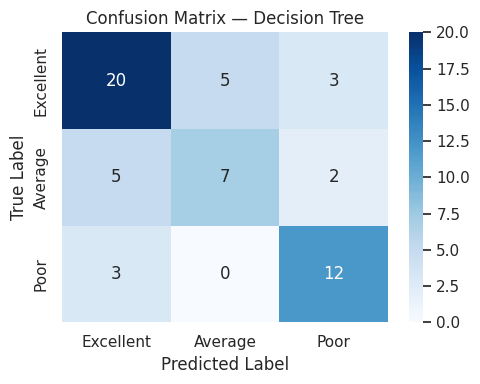

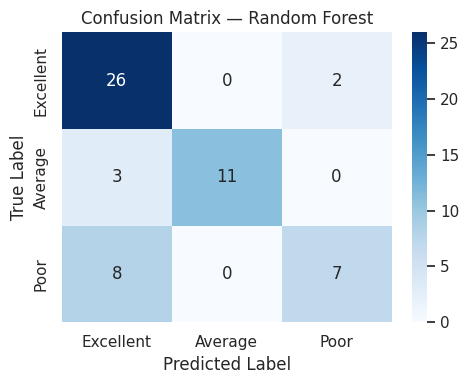

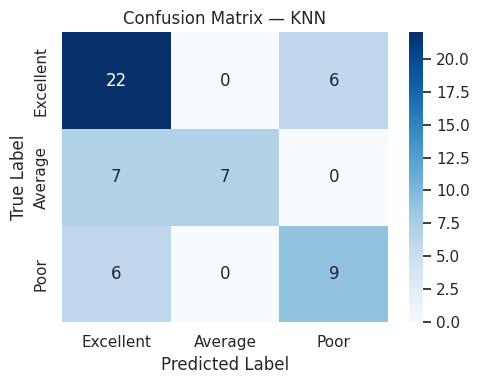

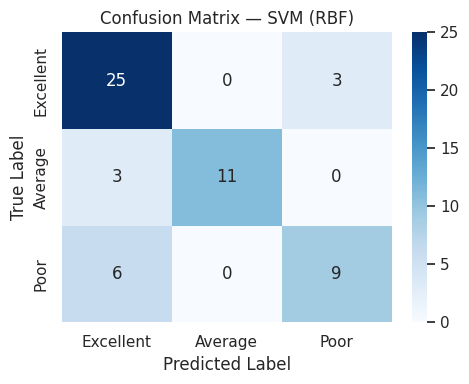

               Accuracy  Precision  Recall  F1 Score
Model                                               
Decision Tree     0.684      0.680   0.684     0.680
Random Forest     0.772      0.795   0.772     0.763
KNN               0.667      0.712   0.667     0.665
SVM (RBF)         0.789      0.804   0.789     0.788


In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


# Data Preparation

# Encode labels
le = LabelEncoder()
all_players['LabelEncoded'] = le.fit_transform(all_players['PerformanceLabel'])

# Feature selection (numeric only, excluding target + index)
X = all_players.select_dtypes(include=['float64', 'int64']).drop(
    columns=['PerformanceIndex', 'LabelEncoded'], errors='ignore'
)
y = all_players['LabelEncoded']

# Handle missing values
X = X.fillna(0)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Model Definitions

models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM (RBF)": SVC(kernel='rbf', probability=True, random_state=42)
}


# Evaluation Function

def evaluate_model(name, model, X_train, y_train, X_test, y_test, class_names):
    """Train, evaluate, and plot confusion matrix for a given model."""
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    # Metrics
    metrics = {
        "Model": name,
        "Accuracy": accuracy_score(y_test, preds),
        "Precision": precision_score(y_test, preds, average='weighted'),
        "Recall": recall_score(y_test, preds, average='weighted'),
        "F1 Score": f1_score(y_test, preds, average='weighted')
    }

    # Confusion Matrix
    cm = confusion_matrix(y_test, preds)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.title(f"Confusion Matrix — {name}")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.tight_layout()
    plt.show()

    return metrics


# Run Evaluations

results_list = []
class_names = ["Excellent", "Average", "Poor"]

for name, model in models.items():
    metrics = evaluate_model(name, model, X_train, y_train, X_test, y_test, class_names)
    results_list.append(metrics)


# Results Summary
results_df = pd.DataFrame(results_list).set_index("Model")
print(results_df.round(3))

/tmp/ipython-input-4065109634.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models_list, y=accuracy_vals, palette="Blues_d")


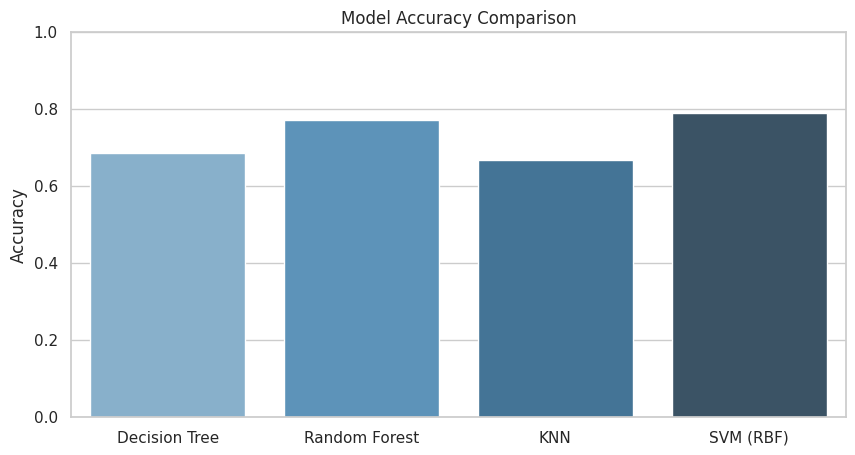

/tmp/ipython-input-4065109634.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models_list, y=f1_vals, palette="Oranges_d")


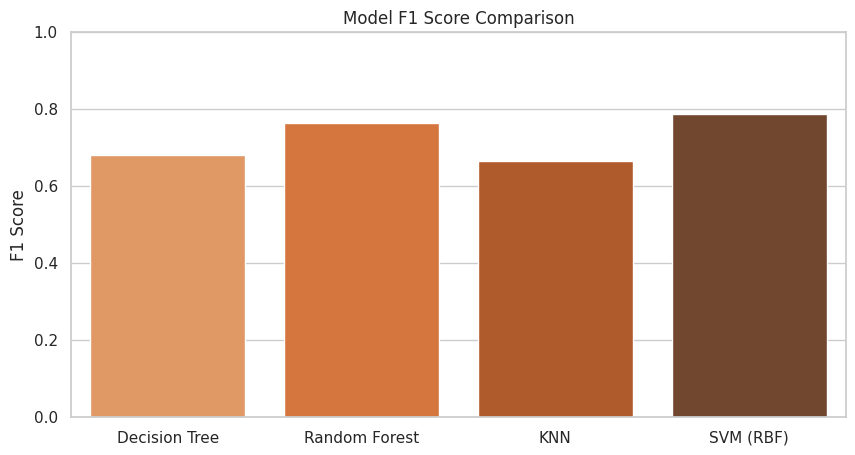

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert results_list (list of dicts) into a DataFrame
results_df = pd.DataFrame(results_list).set_index("Model")

# --- Accuracy and F1 Score Comparison ---
models_list = results_df.index.tolist()
accuracy_vals = results_df["Accuracy"].values
f1_vals = results_df["F1 Score"].values

# Accuracy Plot
plt.figure(figsize=(10,5))
sns.barplot(x=models_list, y=accuracy_vals, palette="Blues_d")
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0.0, 1.0)
plt.show()

# F1 Score Plot
plt.figure(figsize=(10,5))
sns.barplot(x=models_list, y=f1_vals, palette="Oranges_d")
plt.title("Model F1 Score Comparison")
plt.ylabel("F1 Score")
plt.ylim(0.0, 1.0)
plt.show()

## **Bryan's Work**

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Only keep rows where PerformanceIndex is available
reg_df = all_players.dropna(subset=['PerformanceIndex']).copy()

# Define target
target = 'PerformanceIndex'

# Define features: only true numeric columns, exclude any label/categorical encodings
numeric_types = ['float64', 'int64']
exclude_cols = ['PerformanceIndex', 'PerformanceLabel']  # add more if needed

feature_cols = [
    col for col in reg_df.columns
    if reg_df[col].dtype in numeric_types
    and col not in exclude_cols
    and reg_df[col].nunique() > 10   # heuristic: drop low-cardinality ints (likely labels)
]

X = reg_df[feature_cols]
y = reg_df[target]

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
reg = LinearRegression()
reg.fit(X_train_scaled, y_train)

# Predict
y_pred = reg.predict(X_test_scaled)

# Evaluation
print("\n--- Linear Regression ---")
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


--- Linear Regression ---
MSE: 1.344430146308527
R² Score: 0.9019674919246088


In [54]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest Regressor
rf = RandomForestRegressor(
    n_estimators=300,
    random_state=42,
    max_depth=None,
    min_samples_split=2
)

rf.fit(X_train, y_train)   # Random Forest does NOT need scaled data

rf_pred = rf.predict(X_test)

print("\n--- Random Forest Results ---")
print("MSE:", mean_squared_error(y_test, rf_pred))
print("R² Score:", r2_score(y_test, rf_pred))


--- Random Forest Results ---
MSE: 3.39054976663408
R² Score: 0.752769529684963


In [55]:
from xgboost import XGBRegressor

xgb = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

print("\n--- XGBoost Results ---")
print("MSE:", mean_squared_error(y_test, xgb_pred))
print("R² Score:", r2_score(y_test, xgb_pred))


--- XGBoost Results ---
MSE: 2.2650798362302145
R² Score: 0.8348360024904659


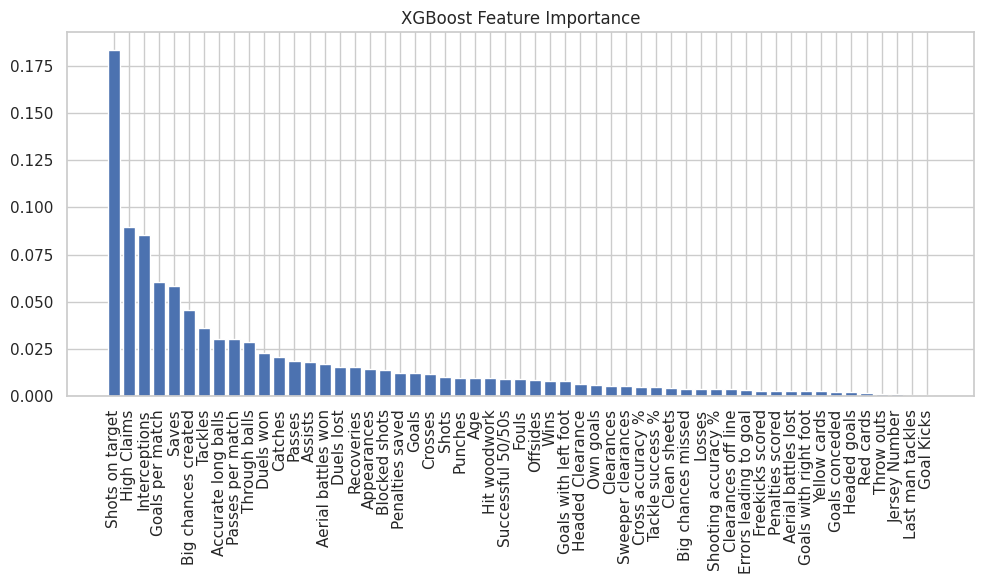

In [56]:
import numpy as np
import matplotlib.pyplot as plt

importances = xgb.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.title("XGBoost Feature Importance")
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), np.array(feature_cols)[indices], rotation=90)
plt.tight_layout()
plt.show()

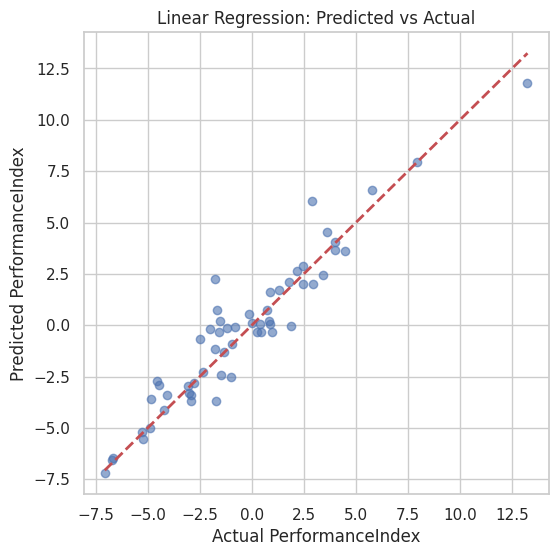

In [57]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', lw=2)

plt.xlabel("Actual PerformanceIndex")
plt.ylabel("Predicted PerformanceIndex")
plt.title("Linear Regression: Predicted vs Actual")
plt.show()

## Kevin's Work

### Simple model predicts player position by stats reduced stat Train/test splitStep 1: Prepare features and labels

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Features: normalized numeric stats

features = df.columns

cols = features.drop([
    'Age', 'Name', 'Appearances', 'Club', 'Nationality', 'Jersey Number','Position'
])

X = all_players[cols].dropna()
print(X.shape)
y = all_players['Position']   # target variable

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

(281, 52)


Step 2: Scale features

In [59]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
print(X_train_scaled.shape)
X_test_scaled = scaler.transform(X_test)
print(X_test_scaled.shape)

(224, 52)
(57, 52)


Step 3: Train a simple mode

In [60]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

Step 4: Evaluate

In [61]:
y_pred = model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Defender       1.00      1.00      1.00        19
     Forward       1.00      1.00      1.00        10
  Goalkeeper       1.00      1.00      1.00         4
  Midfielder       1.00      1.00      1.00        24

    accuracy                           1.00        57
   macro avg       1.00      1.00      1.00        57
weighted avg       1.00      1.00      1.00        57



### Clustering Players Into Performance Based Archeotypes based on Position



In [62]:
feature = all_players.columns
feature

Index(['Name', 'Jersey Number', 'Club', 'Position', 'Nationality', 'Age',
       'Appearances', 'Wins', 'Losses', 'Goals', 'Goals per match',
       'Headed goals', 'Goals with right foot', 'Goals with left foot',
       'Penalties scored', 'Freekicks scored', 'Shots', 'Shots on target',
       'Shooting accuracy %', 'Hit woodwork', 'Big chances missed',
       'Clean sheets', 'Goals conceded', 'Tackles', 'Tackle success %',
       'Last man tackles', 'Blocked shots', 'Interceptions', 'Clearances',
       'Headed Clearance', 'Clearances off line', 'Recoveries', 'Duels won',
       'Duels lost', 'Successful 50/50s', 'Aerial battles won',
       'Aerial battles lost', 'Own goals', 'Errors leading to goal', 'Assists',
       'Passes', 'Passes per match', 'Big chances created', 'Crosses',
       'Cross accuracy %', 'Through balls', 'Accurate long balls', 'Saves',
       'Penalties saved', 'Punches', 'High Claims', 'Catches',
       'Sweeper clearances', 'Throw outs', 'Goal Kicks', 'Yellow 

In [66]:

#all_players = all_players[all_players['Name'] != 'Michail Antonio']
#all_players = all_players[all_players['Name'] != 'Oleksandr Zinchenko']
#all_players = all_players[all_players['Name'] != 'Jeffrey Schlupp']




all_players = all_players.drop(columns=['PerformanceIndex',
       'PerformanceLabel', 'LabelEncoded'])
# Define the base feature set by excluding identifiers and categorical columns
exclude_cols = [
     'Name', 'Jersey Number', 'Club', 'Position', 'Nationality', 'Age',
       'Appearances','Passes','Passes per match','Goals' # 'Shooting accuracy %', 'Tackle success %','Cross accuracy %'
]

cols = all_players.columns.drop(exclude_cols)
print(cols)

Index(['Wins', 'Losses', 'Goals per match', 'Headed goals',
       'Goals with right foot', 'Goals with left foot', 'Penalties scored',
       'Freekicks scored', 'Shots', 'Shots on target', 'Shooting accuracy %',
       'Hit woodwork', 'Big chances missed', 'Clean sheets', 'Goals conceded',
       'Tackles', 'Tackle success %', 'Last man tackles', 'Blocked shots',
       'Interceptions', 'Clearances', 'Headed Clearance',
       'Clearances off line', 'Recoveries', 'Duels won', 'Duels lost',
       'Successful 50/50s', 'Aerial battles won', 'Aerial battles lost',
       'Own goals', 'Errors leading to goal', 'Assists', 'Big chances created',
       'Crosses', 'Cross accuracy %', 'Through balls', 'Accurate long balls',
       'Saves', 'Penalties saved', 'Punches', 'High Claims', 'Catches',
       'Sweeper clearances', 'Throw outs', 'Goal Kicks', 'Yellow cards',
       'Red cards', 'Fouls', 'Offsides'],
      dtype='object')



Analyzing Goalkeeper subset, shape: (25, 49)


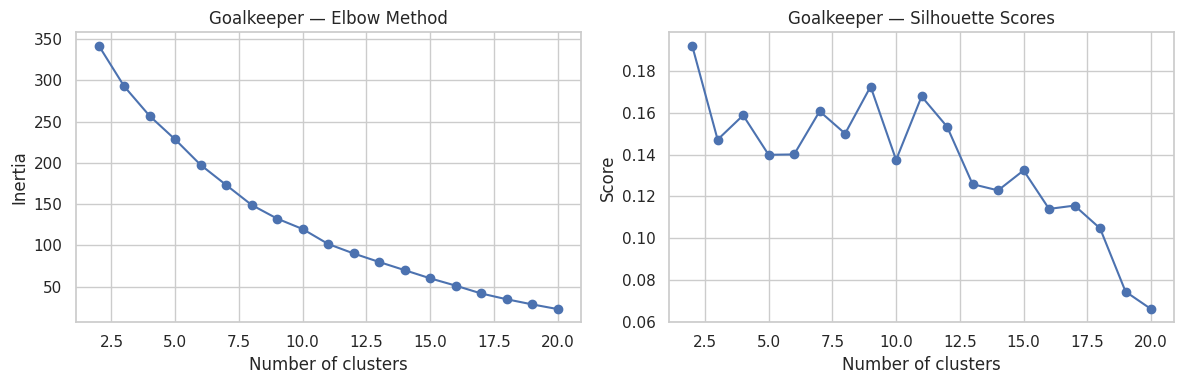

Best k for Goalkeeper: 2

Analyzing Defender subset, shape: (97, 49)


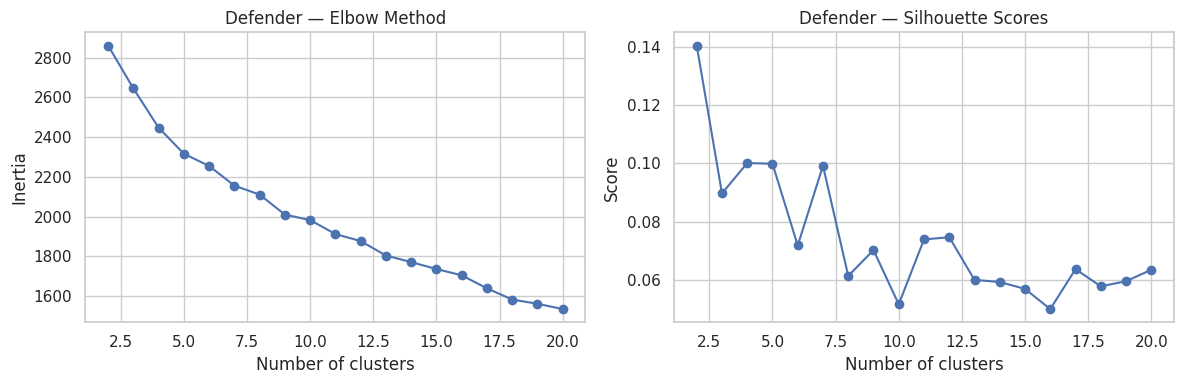

Best k for Defender: 2

Analyzing Midfielder subset, shape: (102, 49)


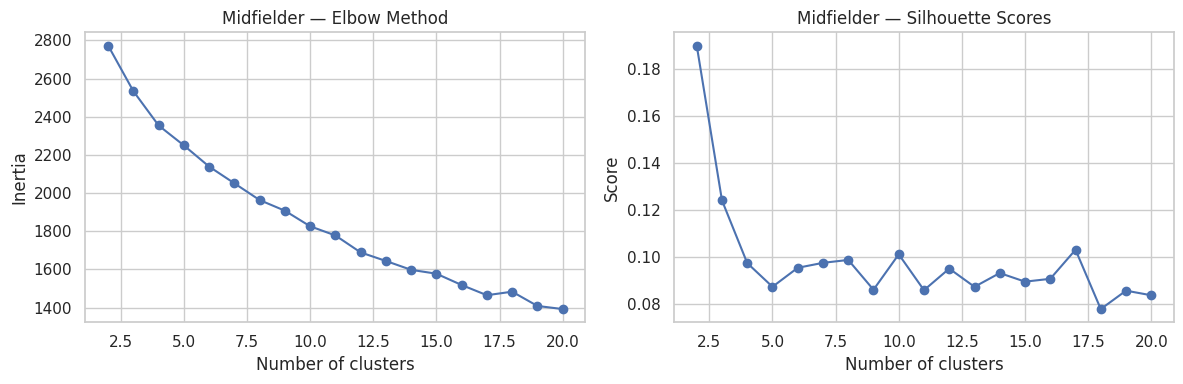

Best k for Midfielder: 2

Analyzing Forward subset, shape: (57, 49)


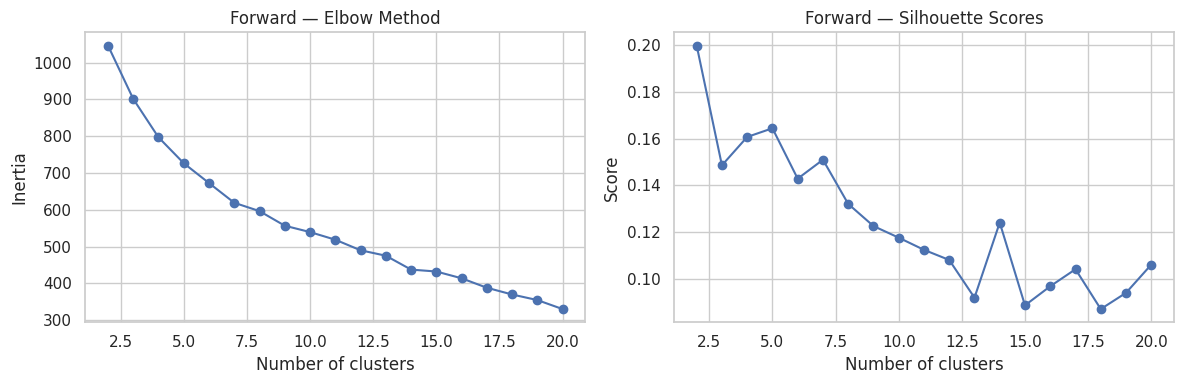

Best k for Forward: 2


In [67]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

clusters_by_position = {}

positions =  ['Goalkeeper','Defender','Midfielder','Forward']

for pos in positions:
    # Subset by position
    subset = all_players.loc[all_players['Position'] == pos, cols].dropna()
    X_scaled = StandardScaler().fit_transform(subset)

    print(f"\nAnalyzing {pos} subset, shape: {X_scaled.shape}")

    # --- Cluster analysis: try different k values ---
    inertias, sil_scores = [], []
    K_range = range(2, 21)

    for k in K_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=20)
        labels = kmeans.fit_predict(X_scaled)
        inertias.append(kmeans.inertia_)
        try:
            sil_scores.append(silhouette_score(X_scaled, labels))
        except Exception:
            sil_scores.append(np.nan)

    # Plot elbow + silhouette curves
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    ax[0].plot(K_range, inertias, marker='o')
    ax[0].set_title(f"{pos} — Elbow Method")
    ax[0].set_xlabel("Number of clusters")
    ax[0].set_ylabel("Inertia")

    ax[1].plot(K_range, sil_scores, marker='o')
    ax[1].set_title(f"{pos} — Silhouette Scores")
    ax[1].set_xlabel("Number of clusters")
    ax[1].set_ylabel("Score")

    plt.tight_layout()
    plt.show()

    # --- Pick best k (highest silhouette score) ---
    valid_scores = [s for s in sil_scores if not np.isnan(s)]
    if valid_scores:
        best_k = K_range[np.nanargmax(sil_scores)]
    else:
        best_k = 2  # fallback if all scores are NaN

    print(f"Best k for {pos}: {best_k}")

    # Fit final KMeans
    kmeans_final = KMeans(n_clusters=best_k, random_state=42, n_init=20)
    labels_final = kmeans_final.fit_predict(X_scaled)

    # Save labels back to dataset
    all_players.loc[subset.index, 'Cluster_' + pos] = labels_final
    clusters_by_position[pos] = labels_final

In [68]:
for pos in positions:  # ['Goalkeeper','Defender','Midfielder','Forward']
    cluster_col = 'Cluster_' + pos

    # Compute cluster means
    summary = (
        all_players[all_players['Position'] == pos]
        .groupby(cluster_col)[cols]
        .mean()
        .round(2)
        .T   # transpose: features as rows, clusters as columns
    )

    # --- Remove features with no difference across clusters ---
    # Calculate variance across clusters for each feature
    feature_var = summary.var(axis=1)

    # Keep only features with variance > 0 (or a threshold, e.g. 0.01)
    summary_filtered = summary.loc[feature_var > 0.01]

    print(f"\n=== {pos} Cluster Profiles (average normalized stats, filtered) ===")
    display(summary_filtered.style.background_gradient(cmap="Blues"))


=== Goalkeeper Cluster Profiles (average normalized stats, filtered) ===



=== Defender Cluster Profiles (average normalized stats, filtered) ===



=== Midfielder Cluster Profiles (average normalized stats, filtered) ===



=== Forward Cluster Profiles (average normalized stats, filtered) ===


In [69]:
for pos in positions:
    cluster_col = 'Cluster_' + pos
    counts = all_players[all_players['Position'] == pos][cluster_col].value_counts()
    print(f"\n{pos} cluster counts:\n{counts}")


Goalkeeper cluster counts:
Cluster_Goalkeeper
0.0    17
1.0     8
Name: count, dtype: int64

Defender cluster counts:
Cluster_Defender
0.0    54
1.0    43
Name: count, dtype: int64

Midfielder cluster counts:
Cluster_Midfielder
0.0    51
1.0    51
Name: count, dtype: int64

Forward cluster counts:
Cluster_Forward
0.0    33
1.0    24
Name: count, dtype: int64


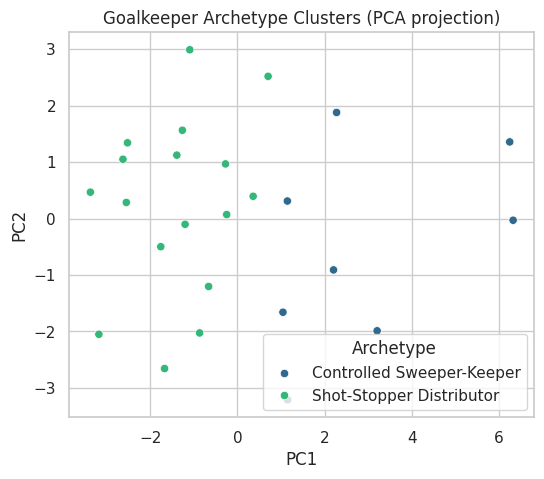

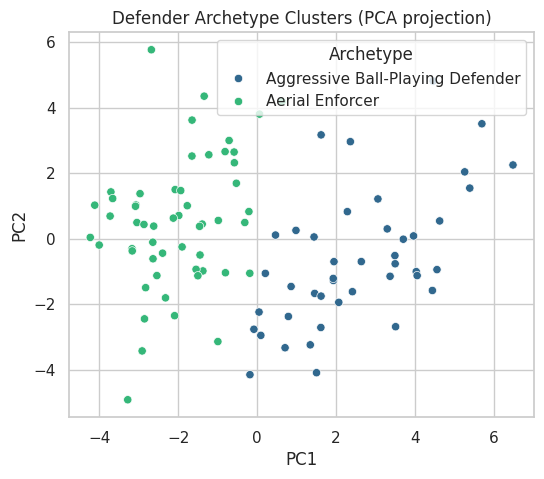

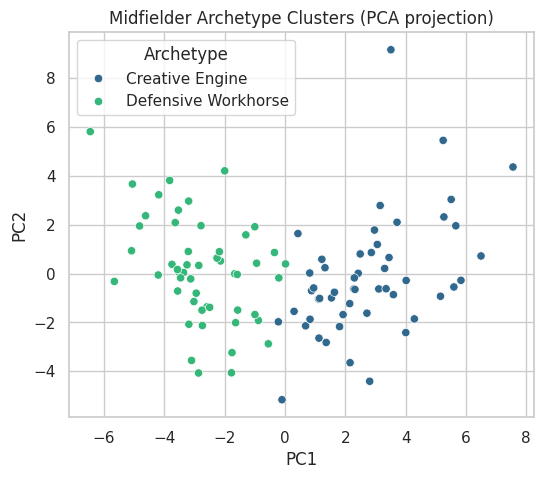

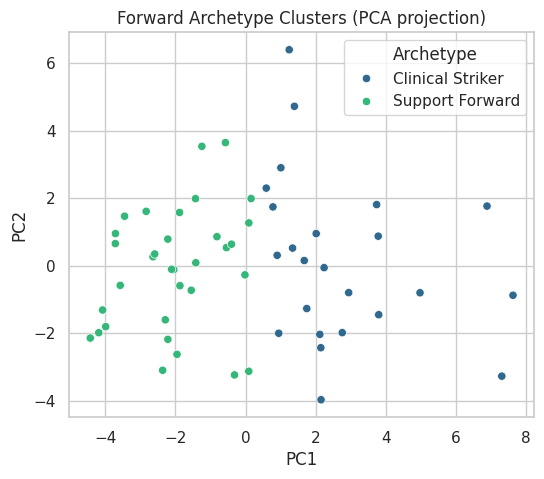

In [70]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Updated archetype label mappings based on cluster profiles
archetype_labels = {
    "Goalkeeper": {
        0: "Shot-Stopper Distributor",      # more saves, long balls, high claims
        1: "Controlled Sweeper-Keeper"      # fewer goals conceded, short throws, calmer profile
    },
    "Defender": {
        0: "Aerial Enforcer",               # clearances, headed duels, aerial dominance
        1: "Aggressive Ball-Playing Defender"  # tackles, crosses, riskier duels
    },
    "Midfielder": {
        0: "Creative Engine",               # shots, crosses, attacking contributions
        1: "Defensive Workhorse"            # tackles, interceptions, recoveries
    },
    "Forward": {
        0: "Support Forward",               # lower goals, fewer shots
        1: "Clinical Striker"               # higher goals, more shots on target
    }
}


for pos in positions:
    subset = all_players[all_players['Position'] == pos][cols].dropna()
    cluster_col = 'Cluster_' + pos

    # Scale again for PCA
    X_scaled = StandardScaler().fit_transform(subset)
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

    # Map cluster IDs to archetype names
    cluster_labels = all_players.loc[subset.index, cluster_col].map(archetype_labels[pos])

    plt.figure(figsize=(6,5))
    sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1],
                    hue=cluster_labels,
                    palette='viridis')
    plt.title(f"{pos} Archetype Clusters (PCA projection)")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.legend(title="Archetype")
    plt.show()

In [72]:
top_n = 3

for pos in archetype_labels.keys():
    cluster_col = 'Cluster_' + pos
    archetype_col = 'Archetype_' + pos

    # Map archetype labels
    all_players.loc[:, archetype_col] = all_players.loc[:, cluster_col].map(archetype_labels[pos])

    # Compute cluster averages
    cluster_means = (
        all_players[all_players['Position'] == pos]
        .groupby(cluster_col)[cols]
        .mean()
    )

    # For each player, compute and assign directly
    for idx, row in all_players[all_players['Position'] == pos].iterrows():
        cluster_id = row[cluster_col]
        cluster_avg = cluster_means.loc[cluster_id]

        diffs = row[cols] - cluster_avg
        fit_score = diffs[diffs > 0].sum()

        if fit_score > 0:
            top_features = diffs[diffs > 0].sort_values(ascending=False).head(top_n)
        else:
            top_features = diffs.sort_values(ascending=False).head(top_n)

        formatted = ", ".join([f"{feat}: {diff:+.2f}" for feat, diff in top_features.items()])

        # Assign directly to the DataFrame row
        all_players.at[idx, "Best_Attributes"] = formatted
        all_players.at[idx, "Archetype_FitScore"] = fit_score

In [73]:
# Show top players per archetype by fit score
for pos in archetype_labels.keys():
    archetype_col = 'Archetype_' + pos
    print(f"\n=== {pos} Archetypes ===")

    for archetype in archetype_labels[pos].values():
        sample = (
            all_players[all_players[archetype_col] == archetype]
            .sort_values("Archetype_FitScore", ascending=False)  # rank by fit score
            .head(3)
        )

        print(f"\n{archetype} — Top players by standout attributes")
        print("-" * 60)

        for _, row in sample.iterrows():
            print(f"{row['Name']} | {row['Club']} | {row['Position']}")
            print(f"Archetype: {row[archetype_col]}")
            print(f"Fit Score: {row['Archetype_FitScore']:.2f}")
            print("Standout Attributes:")
            for attr in row['Best_Attributes'].split(", "):
                print(f"   • {attr}")
            print("")  # blank line between players


=== Goalkeeper Archetypes ===

Shot-Stopper Distributor — Top players by standout attributes
------------------------------------------------------------
Jonas Lössl | Everton | Goalkeeper
Archetype: Shot-Stopper Distributor
Fit Score: 3.86
Standout Attributes:
   • Accurate long balls: +3.30
   • Goals conceded: +0.20
   • Losses: +0.16

Wayne Hennessey | Crystal-Palace | Goalkeeper
Archetype: Shot-Stopper Distributor
Fit Score: 3.37
Standout Attributes:
   • Accurate long balls: +1.42
   • High Claims: +0.55
   • Goal Kicks: +0.45

Tom Heaton | Aston-Villa | Goalkeeper
Archetype: Shot-Stopper Distributor
Fit Score: 2.70
Standout Attributes:
   • Accurate long balls: +1.68
   • Saves: +0.38
   • Goal Kicks: +0.32


Controlled Sweeper-Keeper — Top players by standout attributes
------------------------------------------------------------
Bernd Leno | Arsenal | Goalkeeper
Archetype: Controlled Sweeper-Keeper
Fit Score: 3.68
Standout Attributes:
   • Throw outs: +1.49
   • Saves: +1.02
